In [1]:
 # _*_ coding=utf-8 _*_ 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys, os
from math import log, ceil
import time
sys.path.append('./lib')
# from fountain_lib import soliton, robust_soliton

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

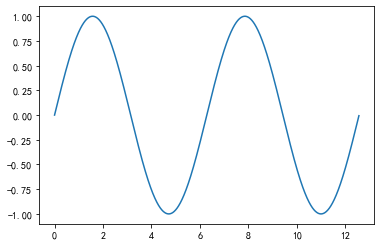

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,4*np.pi,0.01)
y=np.sin(x)

plt.plot(x,y)
plt.show()

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, g

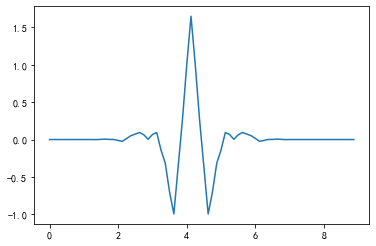

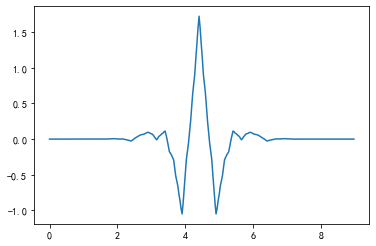

In [33]:
import pylab
import pywt

print(pywt.families())
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))

w1 = pywt.Wavelet('bior4.4')
w2 = pywt.Wavelet('bior4.4')


(phi_d1, psi_d1, phi_r1, psi_r1, x1) = w1.wavefun(level=3)
pylab.plot(x1, psi_d1)
pylab.show()

(phi_d2, psi_d2, phi_r2, psi_r2, x2) = w2.wavefun(level=5)
pylab.plot(x2, psi_d2)
pylab.show()


(128, 128)


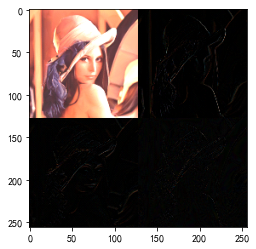

In [38]:
from  PIL import Image
import pywt
IMG = './doc/18.jpg'
IMG = './doc/whale_128.bmp'
IMG = './doc/lena.png'
img = Image.open(IMG)
width, heigh = img.size
mat = [np.empty((width, heigh)) for ii in range(3)]
for i in range(width):
    for j in range(heigh):
        (r, g, b)  = img.getpixel((i, j))
        mat[0][i, j] = r
        mat[1][i, j] = g
        mat[2][i, j] = b
coff = [pywt.dwt2(ii, 'haar', 'periodization') for ii in mat]
re_img = Image.new("RGB", (width, heigh), (0, 0, 20))
print(coff[0][0].shape)
for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = np.int64(coff[0][0][i][j])
        G = np.int64(coff[1][0][i][j])
        B = np.int64(coff[2][0][i][j])        
        re_img.putpixel((i, j), (R, G, B))        

for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = coff[0][1][0][i][j]
        G = coff[1][1][0][i][j]
        B = coff[2][1][0][i][j]
        re_img.putpixel((i+int(width/2), j), (int(R), int(G), int(B)))

for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = coff[0][1][1][i][j]
        G = coff[1][1][1][i][j]
        B = coff[2][1][1][i][j]
        re_img.putpixel((i, j+int(heigh/2)), (int(R), int(G), int(B)))

for i in range(int(width / 2)):
    for j in range(int(heigh / 2)):
        R = coff[0][1][2][i][j]
        G = coff[1][1][2][i][j]
        B = coff[2][1][2][i][j]
        re_img.putpixel((i+int(width/2), j+int(heigh/2)), (int(R), int(G), int(B)))

img.save('./simulation/lena.bmp')        
re_img.save('./simulation/lena_dwt2.bmp')        
    
plt.imshow(re_img)
plt.show()
# del re_img        


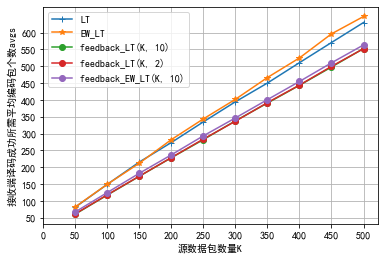

In [15]:
# K与接收完成所需平均编码包数avgs关系
df = pd.read_csv('./simulation/avgs_Wed_Dec__2_17_05_04_2020.csv')
K = df['K']
avgs = df['avgs']

df1 = pd.read_csv('./simulation/EW_avgs_Wed_Dec__2_16_38_56_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']

df2 = pd.read_csv('./simulation/feedback_avgs_Wed_Dec__2_18_01_45_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']

df3 = pd.read_csv('./simulation/feedback_avgs_Wed_Dec__2_19_45_35_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']

df4 = pd.read_csv('./simulation/feedback_EW_avgs_Fri_Dec__4_22_26_47_2020.csv')
K4 = df4['K']
avgs4 = df4['avgs']

# RSD(0.03, 0.05)
plt.plot(K, avgs, marker='+', label='LT')
plt.plot(K1, avgs1, marker='*', label='EW_LT')
plt.plot(K2, avgs2, marker='o', label='feedback_LT(K, 10)')
plt.plot(K3, avgs3, marker='o', label='feedback_LT(K, 2)')
plt.plot(K4, avgs4, marker='o', label='feedback_EW_LT(K, 10)')

plt.xticks(range(0, 500+50, 50))
plt.yticks(np.arange(50, 600+50, 50))
plt.xlabel('源数据包数量K')
plt.ylabel('接收端译码成功所需平均编码包个数avgs')
plt.legend()
plt.grid()
plt.savefig('./simulation/K-avgs' +time.asctime().replace(' ', '_').replace(':', '_') + '.pdf')

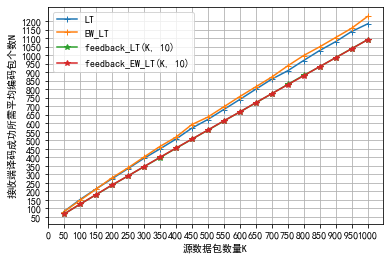

In [12]:
# K与接收完成所需平均编码包数avgs关系(K=[50,1000], 100次
df = pd.read_csv('./simulation/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avgs = df['avgs']

df1 = pd.read_csv('./simulation/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']

df2 = pd.read_csv('./simulation/EW_avgs_Mon_Dec_14_23_28_02_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']

df3 = pd.read_csv('./simulation/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']


# RSD(0.03, 0.05)
plt.plot(K, avgs, marker='+', label='LT')
plt.plot(K2, avgs2, marker='+', label='EW_LT')
plt.plot(K1, avgs1, marker='*', label='feedback_LT(K, 10)')
plt.plot(K3, avgs3, marker='*', label='feedback_EW_LT(K, 10)')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(50, 1200+50, 50))
plt.xlabel('源数据包数量K')
plt.ylabel('接收端译码成功所需平均编码包个数N')
plt.legend()
plt.grid()
plt.savefig('./simulation/K-avgs' +time.asctime().replace(' ', '_').replace(':', '_') + '.pdf')

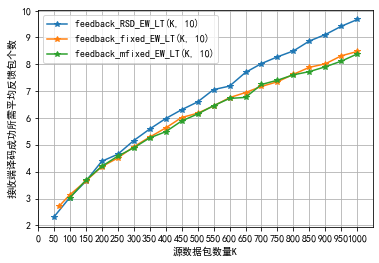

In [53]:
# K与接收完成所需平均反馈包数关系(K=[50,1000], 100次
# df = pd.read_csv('./simulation/RSD_LT/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
# K = df['K']
# avgs = df['feedback_packet_avgs']

df2 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_10/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K2 = df2['K']
avgs2 = df2['feedback_packet_avgs']

#fixed
# df6 = pd.read_csv('./simulation/fixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_11_45_15_2020.csv')
# K6 = df6['K']
# avgs6 = df6['feedback_packet_avgs']

df7 = pd.read_csv('simulation/fixed/K_10/fixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_16_06_05_2020.csv')
K7 = df7['K']
avgs7 = df7['feedback_packet_avgs']

#mfixed
# df10 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_16_03_56_2020.csv')
# K10 = df10['K']
# avgs10 = df10['feedback_packet_avgs']

df11 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K11 = df11['K']
avgs11 = df11['feedback_packet_avgs']

# plt.plot(K, avgs, marker='*', label='feedback_LT(K, 10)')
plt.plot(K2, avgs2, marker='*', label='feedback_RSD_EW_LT(K, 10)')
# plt.plot(K6, avgs6, marker='*', label='fixed_degree_feedback_LT(K, 10)')
plt.plot(K7, avgs7, marker='*', label='feedback_fixed_EW_LT(K, 10)')
# plt.plot(K10, avgs10, marker='*', label='mfixed_degree_feedback_LT(K, 10)')
plt.plot(K11, avgs11, marker='*', label='feedback_mfixed_EW_LT(K, 10)')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(0+2, 10+1, 1))
plt.xlabel('源数据包数量K')
plt.ylabel('接收端译码成功所需平均反馈包个数')
plt.legend()
plt.grid()
plt.savefig('./simulation/K-feedbackPacket_EW_avgs' +time.asctime().replace(' ', '_').replace(':', '_') + '.pdf')

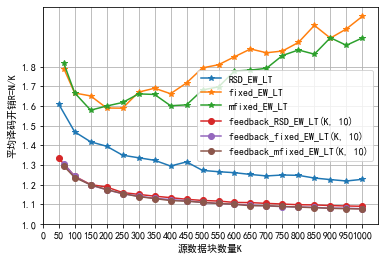

In [13]:
# K与度分布函数以及接收完成平均译码开销关系(K=[50,1000], 100次
# RSD(0.03, 0.05)
df = pd.read_csv('./simulation/RSD_LT/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avgs = df['avgs']
overhead = [float(avgs[i]/K[i]) for i in range(len(K))]

df1 = pd.read_csv('./simulation/RSD_EW_LT/drop改ew_drop后/EW_avgs_Mon_Dec_14_23_28_02_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/K1[i]) for i in range(K1.shape[0])]

df2 = pd.read_csv('./simulation/RSD_LT/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in range(K2.shape[0])]

df3 = pd.read_csv('./simulation/RSD_EW_LT/drop改ew_drop后/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']
overhead3 = [float(avgs3[i]/K3[i]) for i in range(K3.shape[0])]

# fixed
df4 = pd.read_csv('./simulation/fixed_degree_LT(K-avgs)_Tue_Dec_15_11_39_22_2020.csv')
K4 = df4['K']
avgs4 = df4['avgs']
overhead4 = [float(avgs4[i]/K4[i]) for i in range(len(K4))]

df5 = pd.read_csv('./simulation/fixed_degree_EW_LT(K-avgs)_Tue_Dec_15_15_25_48_2020.csv')
K5 = df5['K']
avgs5 = df5['avgs']
overhead5 = [float(avgs5[i]/K5[i]) for i in range(len(K5))]

df6 = pd.read_csv('./simulation/fixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_11_45_15_2020.csv')
K6 = df6['K']
avgs6 = df6['avgs']
overhead6 = [float(avgs6[i]/K6[i]) for i in range(len(K6))]

df7 = pd.read_csv('./simulation/fixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_16_06_05_2020.csv')
K7 = df7['K']
avgs7 = df7['avgs']
overhead7 = [float(avgs7[i]/K7[i]) for i in range(len(K7))]

# mfixed
df8 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_LT(K-avgs)_avgs_Tue_Dec_15_15_57_54_2020.csv')
K8 = df8['K']
avgs8 = df8['avgs']
overhead8 = [float(avgs8[i]/K8[i]) for i in range(len(K8))]

df9 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_EW_LT(K-avgs)_Tue_Dec_15_20_40_03_2020.csv')
K9 = df9['K']
avgs9 = df9['avgs']
overhead9 = [float(avgs9[i]/K9[i]) for i in range(len(K9))]

df10 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_16_03_56_2020.csv')
K10 = df10['K']
avgs10 = df10['avgs']
overhead10 = [float(avgs10[i]/K10[i]) for i in range(len(K10))]

df11 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K11 = df11['K']
avgs11 = df11['avgs']
overhead11 = [float(avgs11[i]/K11[i]) for i in range(len(K11))]


# plt.plot(K, overhead, marker='*', label='RSD_LT')
plt.plot(K1, overhead1, marker='*', label='RSD_EW_LT')
# plt.plot(K4, overhead4, marker='*', label='fixed_LT')
plt.plot(K5, overhead5, marker='*', label='fixed_EW_LT')
# plt.plot(K8, overhead8, marker='*', label='mfixed_LT')
plt.plot(K9, overhead9, marker='*', label='mfixed_EW_LT')
# plt.plot(K2, overhead2, marker='o', label='feedback_RSD_LT(K, 10)')
plt.plot(K3, overhead3, marker='o', label='feedback_RSD_EW_LT(K, 10)')
# plt.plot(K6, overhead6, marker='o', label='feedback_fixed_LT(K, 10)')
plt.plot(K7, overhead7, marker='o', label='feedback_fixed_EW_LT(K, 10)')
# plt.plot(K10, overhead10, marker='o', label='feedback_mfixed_LT(K, 10)')
plt.plot(K11, overhead11, marker='o', label='feedback_mfixed_EW_LT(K, 10)')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(1, 1.9, 0.1))
plt.xlabel('源数据块数量K')
plt.ylabel('平均译码开销R=N/K')
plt.legend()
plt.grid()
plt.savefig('./simulation/K-func-overhead-EW-LT'+ '.pdf')

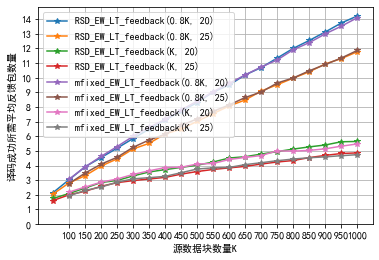

In [7]:
# NEW 反馈时两个参数的选择(译码开销, 反馈包数)

# RSD_LT_feedback
# 0.8K_20
df = pd.read_csv('simulation/RSD_LT/0.8K_20/feedback_avgs_Thu_Dec_31_11_43_28_2020.csv')
K = df['K']
avgs = df['avgs']
overhead = [float(avgs[i]/K[i]) for i in range(len(K))]
fbn = df['feedback_packet_avgs']
# 0.8K_25
df1 = pd.read_csv('simulation/RSD_LT/0.8K_25/feedback_avgs_Thu_Dec_31_13_22_39_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/K1[i]) for i in range(len(K1))]
fbn1 = df1['feedback_packet_avgs']
# K_20
df2 = pd.read_csv('simulation/RSD_LT/K_20/feedback_avgs_Thu_Dec_31_17_02_54_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in range(len(K2))]
fbn2 = df2['feedback_packet_avgs']
# K_25
df3 = pd.read_csv('simulation/RSD_LT/K_25/feedback_avgs_Thu_Dec_31_19_56_46_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']
overhead3 = [float(avgs3[i]/K3[i]) for i in range(len(K3))]
fbn3 = df3['feedback_packet_avgs']

# RSD_EW_LT_feedback
# 0.8K_20
df4 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/0.8K_20/feedback_EW_avgs_Thu_Dec_31_11_04_31_2020.csv')
K4 = df4['K']
avgs4 = df4['avgs']
overhead4 = [float(avgs4[i]/K4[i]) for i in range(len(K4))]
fbn4 = df4['feedback_packet_avgs']
# 0.8K_25
df5 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/0.8K_25/feedback_EW_avgs_Thu_Dec_31_12_46_40_2020.csv')
K5 = df5['K']
avgs5 = df5['avgs']
overhead5 = [float(avgs5[i]/K5[i]) for i in range(len(K5))]
fbn5 = df5['feedback_packet_avgs']
# K_20
df6 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_20/feedback_EW_avgs_Thu_Dec_31_16_18_07_2020.csv')
K6 = df6['K']
avgs6 = df6['avgs']
overhead6 = [float(avgs6[i]/K6[i]) for i in range(len(K6))]
fbn6 = df6['feedback_packet_avgs']
# K_25
df7 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_25/feedback_EW_avgs_Thu_Dec_31_19_11_55_2020.csv')
K7 = df7['K']
avgs7 = df7['avgs']
overhead7 = [float(avgs7[i]/K7[i]) for i in range(len(K7))]
fbn7 = df7['feedback_packet_avgs']



# mfixed_LT_feedback
# 0.8K_20
df8 = pd.read_csv('simulation/mfixed/0.8K_20/mfixed_degree_feedback_LT(K-avgs)_Thu_Dec_31_10_55_58_2020.csv')
K8 = df8['K']
avgs8 = df8['avgs']
overhead8 = [float(avgs8[i]/K8[i]) for i in range(len(K8))]
fbn8 = df8['feedback_packet_avgs']
# 0.8K_25
df9 = pd.read_csv('simulation/mfixed/0.8K_25/mfixed_degree_feedback_LT(K-avgs)_Thu_Dec_31_11_51_11_2020.csv')
K9 = df9['K']
avgs9 = df9['avgs']
overhead9 = [float(avgs9[i]/K9[i]) for i in range(len(K9))]
fbn9 = df9['feedback_packet_avgs']
# K_20
df10 = pd.read_csv('simulation/mfixed/K_20/mfixed_degree_feedback_LT(K-avgs)_Thu_Dec_31_12_51_25_2020.csv')
K10 = df10['K']
avgs10 = df10['avgs']
overhead10 = [float(avgs10[i]/K10[i]) for i in range(len(K10))]
fbn10 = df10['feedback_packet_avgs']
# K_25
df11 = pd.read_csv('simulation/mfixed/K_25/mfixed_degree_feedback_LT(K-avgs)_Thu_Dec_31_16_04_31_2020.csv')
K11 = df11['K']
avgs11 = df11['avgs']
overhead11 = [float(avgs11[i]/K11[i]) for i in range(len(K11))]
fbn11 = df11['feedback_packet_avgs']

# mfixed_EW_LT_feedback
# 0.8K_20
df12 = pd.read_csv('simulation/mfixed/0.8K_20/mfixed_degree_feedback_EW_LT(K-avgs)_Thu_Dec_31_10_49_20_2020.csv')
K12 = df12['K']
avgs12 = df12['avgs']
overhead12 = [float(avgs12[i]/K12[i]) for i in range(len(K12))]
fbn12 = df12['feedback_packet_avgs']
# 0.8K_25
df13 = pd.read_csv('simulation/mfixed/0.8K_25/mfixed_degree_feedback_EW_LT(K-avgs)_Thu_Dec_31_11_44_26_2020.csv')
K13 = df13['K']
avgs13 = df13['avgs']
overhead13 = [float(avgs13[i]/K13[i]) for i in range(len(K13))]
fbn13 = df13['feedback_packet_avgs']
# K_20
df14 = pd.read_csv('simulation/mfixed/K_20/mfixed_degree_feedback_EW_LT(K-avgs)_Thu_Dec_31_12_45_19_2020.csv')
K14 = df14['K']
avgs14 = df14['avgs']
overhead14 = [float(avgs14[i]/K14[i]) for i in range(len(K14))]
fbn14 = df14['feedback_packet_avgs']
# K_25
df15 = pd.read_csv('simulation/mfixed/K_25/mfixed_degree_feedback_EW_LT(K-avgs)_Thu_Dec_31_15_57_56_2020.csv')
K15 = df15['K']
avgs15 = df15['avgs']
overhead15 = [float(avgs15[i]/K15[i]) for i in range(len(K15))]
fbn15 = df15['feedback_packet_avgs']

# 无反馈
# RSD_LT
df16 = pd.read_csv('simulation/RSD_LT/K_10/avgs_Sat_Dec__5_23_10_47_2020.csv')
K16 = df16['K']
avgs16 = df16['avgs']
overhead16 = [float(avgs16[i]/K16[i]) for i in range(len(K16))]
# RSD_EW_LT
df17 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_10/EW_avgs_Mon_Dec_14_23_28_02_2020.csv')
K17 = df17['K']
avgs17 = df17['avgs']
overhead17 = [float(avgs17[i]/K17[i]) for i in range(len(K17))]

# mfixed_LT
df18 = pd.read_csv('simulation\mfixed\K_10\mfixed_degree_LT(K-avgs)_avgs_Tue_Dec_15_15_57_54_2020.csv')
K18 = df18['K']
avgs18 = df18['avgs']
overhead18 = [float(avgs18[i]/K18[i]) for i in range(len(K18))]
# mfixed_EW_LT
df19 = pd.read_csv('simulation\mfixed\K_10\mfixed_degree_EW_LT(K-avgs)_Tue_Dec_15_20_40_03_2020.csv')
K19 = df19['K']
avgs19 = df19['avgs']
overhead19 = [float(avgs19[i]/K19[i]) for i in range(len(K19))]



# 译码开销
# plt.plot(K, overhead, marker='*', label='RSD_LT_feedback(0.8K, 20)')
# plt.plot(K1, overhead1, marker='*', label='RSD_LT_feedback(0.8K, 25)')
# plt.plot(K2, overhead2, marker='*', label='RSD_LT_feedback(K, 20)')
# plt.plot(K3, overhead3, marker='*', label='RSD_LT_feedback(K, 25)')

# plt.plot(K4, overhead4, marker='*', label='RSD_EW_LT_feedback(0.8K, 20)')
# plt.plot(K5, overhead5, marker='*', label='RSD_EW_LT_feedback(0.8K, 25)')
# plt.plot(K6, overhead6, marker='*', label='RSD_EW_LT_feedback(K, 20)')
# plt.plot(K7, overhead7, marker='*', label='RSD_EW_LT_feedback(K, 25)')


# plt.plot(K8, overhead8, marker='*', label='mfixed_LT_feedback(0.8K, 20)')
# plt.plot(K9, overhead9, marker='*', label='mfixed_LT_feedback(0.8K, 25)')
# plt.plot(K10, overhead10, marker='*', label='mfixed_LT_feedback(K, 20)')
# plt.plot(K11, overhead11, marker='*', label='mfixed_LT_feedback(K, 25)')

# plt.plot(K12, overhead12, marker='*', label='mfixed_EW_LT_feedback(0.8K, 20)')
# plt.plot(K13, overhead13, marker='*', label='mfixed_EW_LT_feedback(0.8K, 25)')
# plt.plot(K14, overhead14, marker='*', label='mfixed_EW_LT_feedback(K, 20)')
# plt.plot(K15, overhead15, marker='*', label='mfixed_EW_LT_feedback(K, 25)')

# plt.plot(K16, overhead16, marker='*', label='RSD_LT')
# plt.plot(K17, overhead17, marker='*', label='RSD_EW_LT')
# plt.plot(K18, overhead18, marker='*', label='mfixed_LT')
# plt.plot(K19, overhead19, marker='*', label='mfixed_EW_LT')

# 反馈包数量
# plt.plot(K, fbn, marker='*', label='RSD_LT_feedback(0.8K, 20)')
# plt.plot(K1, fbn1, marker='*', label='RSD_LT_feedback(0.8K, 25)')
# plt.plot(K2, fbn2, marker='*', label='RSD_LT_feedback(K, 20)')
# plt.plot(K3, fbn3, marker='*', label='RSD_LT_feedback(K, 25)')

plt.plot(K4, fbn4, marker='*', label='RSD_EW_LT_feedback(0.8K, 20)')
plt.plot(K5, fbn5, marker='*', label='RSD_EW_LT_feedback(0.8K, 25)')
plt.plot(K6, fbn6, marker='*', label='RSD_EW_LT_feedback(K, 20)')
plt.plot(K7, fbn7, marker='*', label='RSD_EW_LT_feedback(K, 25)')


# plt.plot(K8, fbn8, marker='*', label='mfixed_LT_feedback(0.8K, 20)')
# plt.plot(K9, fbn9, marker='*', label='mfixed_LT_feedback(0.8K, 25)')
# plt.plot(K10, fbn10, marker='*', label='mfixed_LT_feedback(K, 20)')
# plt.plot(K11, fbn11, marker='*', label='mfixed_LT_feedback(K, 25)')

plt.plot(K12, fbn12, marker='*', label='mfixed_EW_LT_feedback(0.8K, 20)')
plt.plot(K13, fbn13, marker='*', label='mfixed_EW_LT_feedback(0.8K, 25)')
plt.plot(K14, fbn14, marker='*', label='mfixed_EW_LT_feedback(K, 20)')
plt.plot(K15, fbn15, marker='*', label='mfixed_EW_LT_feedback(K, 25)')



# plt.xticks(range(0+100, 1000+50, 50))
# plt.yticks(np.arange(1+0.1, 1.4, 0.1))
# plt.xlabel('源数据块数量K')
# plt.ylabel('平均译码开销R=N/K')
# plt.legend()
# plt.grid()
# plt.savefig('./simulation/反馈时两个参数的选取/real_both_overhead'+ '.pdf')

plt.xticks(range(0+100, 1000+50, 50))
plt.yticks(np.arange(0, 15, 1))
plt.xlabel('源数据块数量K')
plt.ylabel('译码成功所需平均反馈包数量')
plt.legend()
plt.grid()
plt.savefig('./simulation/反馈时两个参数的选取/反馈包数'+ '.pdf')

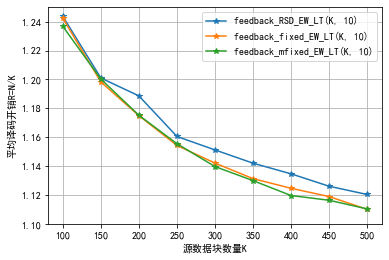

In [24]:
# K=[150:500]
# K与度分布函数以及接收完成平均译码开销关系 100次
# RSD(0.03, 0.05)
idx = [1,2,3,4,5,6,7,8,9]
df = pd.read_csv('./simulation/RSD_LT/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avgs = df['avgs']
overhead = [float(avgs[i]/K[i]) for i in idx]

df1 = pd.read_csv('./simulation/RSD_EW_LT/drop改ew_drop后/EW_avgs_Mon_Dec_14_23_28_02_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/K1[i]) for i in idx]

df2 = pd.read_csv('./simulation/RSD_LT/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in idx]

df3 = pd.read_csv('./simulation/RSD_EW_LT/drop改ew_drop后/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']
overhead3 = [float(avgs3[i]/K3[i]) for i in idx]

# fixed
df4 = pd.read_csv('./simulation/fixed_degree_LT(K-avgs)_Tue_Dec_15_11_39_22_2020.csv')
K4 = df4['K']
avgs4 = df4['avgs']
overhead4 = [float(avgs4[i]/K4[i]) for i in idx]

df5 = pd.read_csv('./simulation/fixed_degree_EW_LT(K-avgs)_Tue_Dec_15_15_25_48_2020.csv')
K5 = df5['K']
avgs5 = df5['avgs']
overhead5 = [float(avgs5[i]/K5[i]) for i in idx]

df6 = pd.read_csv('./simulation/fixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_11_45_15_2020.csv')
K6 = df6['K']
avgs6 = df6['avgs']
overhead6 = [float(avgs6[i]/K6[i]) for i in idx]

df7 = pd.read_csv('./simulation/fixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_16_06_05_2020.csv')
K7 = df7['K']
avgs7 = df7['avgs']
overhead7 = [float(avgs7[i]/K7[i]) for i in idx]

# mfixed
df8 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_LT(K-avgs)_avgs_Tue_Dec_15_15_57_54_2020.csv')
K8 = df8['K']
avgs8 = df8['avgs']
overhead8 = [float(avgs8[i]/K8[i]) for i in idx]

df9 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_EW_LT(K-avgs)_Tue_Dec_15_20_40_03_2020.csv')
K9 = df9['K']
avgs9 = df9['avgs']
overhead9 = [float(avgs9[i]/K9[i]) for i in idx]

df10 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_16_03_56_2020.csv')
K10 = df10['K']
avgs10 = df10['avgs']
overhead10 = [float(avgs10[i]/K10[i]) for i in idx]

df11 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K11 = df11['K']
avgs11 = df11['avgs']
overhead11 = [float(avgs11[i]/K11[i]) for i in idx]


# plt.plot(K, overhead, marker='*', label='RSD_LT')
# plt.plot(K1[1:10], overhead1, marker='*', label='RSD_EW_LT')
# plt.plot(K4, overhead4, marker='*', label='fixed_LT')
# plt.plot(K5[1:10], overhead5, marker='*', label='fixed_EW_LT')
# plt.plot(K8, overhead8, marker='*', label='mfixed_LT')
# plt.plot(K9[1:10], overhead9, marker='*', label='mfixed_EW_LT')
# plt.plot(K2[1:10], overhead2, marker='*', label='feedback_RSD_LT(K, 10)')
plt.plot(K3[1:10], overhead3, marker='*', label='feedback_RSD_EW_LT(K, 10)')
# plt.plot(K6[1:10], overhead6, marker='*', label='feedback_fixed_LT(K, 10)')
plt.plot(K7[1:10], overhead7, marker='*', label='feedback_fixed_EW_LT(K, 10)')
# plt.plot(K10[1:10], overhead10, marker='*', label='feedback_mfixed_LT(K, 10)')
plt.plot(K11[1:10], overhead11, marker='*', label='feedback_mfixed_EW_LT(K, 10)')

plt.xticks(range(100, 500+50, 50))
plt.yticks(np.arange(1.0+0.1, 1.24+0.02, 0.02))
plt.xlabel('源数据块数量K')
plt.ylabel('平均译码开销R=N/K')
plt.legend()
plt.grid()
plt.savefig('./simulation/K-func-overhead-feedback-EW-LT-K=100-500'+ '.pdf')

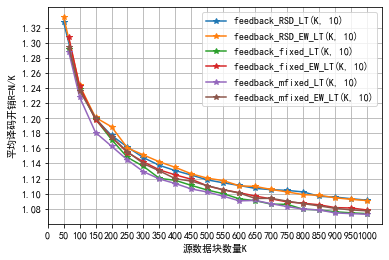

In [24]:
df2 = pd.read_csv('./simulation/RSD_LT/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in range(K2.shape[0])]

df3 = pd.read_csv('./simulation/RSD_EW_LT/drop改ew_drop后/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']
overhead3 = [float(avgs3[i]/K3[i]) for i in range(K3.shape[0])]

df6 = pd.read_csv('./simulation/fixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_11_45_15_2020.csv')
K6 = df6['K']
avgs6 = df6['avgs']
overhead6 = [float(avgs6[i]/K6[i]) for i in range(len(K6))]

df7 = pd.read_csv('./simulation/fixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_16_06_05_2020.csv')
K7 = df7['K']
avgs7 = df7['avgs']
overhead7 = [float(avgs7[i]/K7[i]) for i in range(len(K7))]

df10 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_16_03_56_2020.csv')
K10 = df10['K']
avgs10 = df10['avgs']
overhead10 = [float(avgs10[i]/K10[i]) for i in range(len(K10))]

df11 = pd.read_csv('./simulation/mfixed_LT/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K11 = df11['K']
avgs11 = df11['avgs']
overhead11 = [float(avgs11[i]/K11[i]) for i in range(len(K11))]


plt.plot(K2, overhead2, marker='*', label='feedback_RSD_LT(K, 10)')
plt.plot(K3, overhead3, marker='*', label='feedback_RSD_EW_LT(K, 10)')

plt.plot(K6, overhead6, marker='*', label='feedback_fixed_LT(K, 10)')
plt.plot(K7, overhead7, marker='*', label='feedback_fixed_EW_LT(K, 10)')

plt.plot(K10, overhead10, marker='*', label='feedback_mfixed_LT(K, 10)')
plt.plot(K11, overhead11, marker='*', label='feedback_mfixed_EW_LT(K, 10)')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(1.08, 1.34, 0.02))
plt.xlabel('源数据块数量K')
plt.ylabel('平均译码开销R=N/K')
plt.legend()
plt.grid()
plt.savefig('./simulation/feedback-both-K-func-overhead'+ '.pdf')




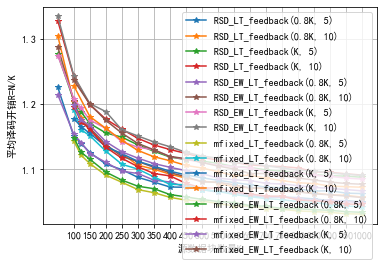

In [51]:
# 反馈时两个参数的选择(译码开销, 反馈包数)

# RSD_LT_feedback
# 0.8K_5
df = pd.read_csv('simulation/RSD_LT/0.8K_5/feedback_avgs_Sat_Dec_26_21_46_04_2020.csv')
K = df['K']
avgs = df['avgs']
overhead = [float(avgs[i]/K[i]) for i in range(len(K))]
fbn = df['feedback_packet_avgs']
# 0.8K_10
df1 = pd.read_csv('simulation/RSD_LT/0.8K_10/feedback_avgs_Fri_Dec_25_22_42_12_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/K1[i]) for i in range(len(K1))]
fbn1 = df1['feedback_packet_avgs']
# K_5
df2 = pd.read_csv('simulation/RSD_LT/K_5/feedback_avgs_Sat_Dec_26_17_35_20_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in range(len(K2))]
fbn2 = df2['feedback_packet_avgs']
# K_10
df3 = pd.read_csv('simulation/RSD_LT/K_10/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']
overhead3 = [float(avgs3[i]/K3[i]) for i in range(len(K3))]
fbn3 = df3['feedback_packet_avgs']

# RSD_EW_LT_feedback
# 0.8K_5
df4 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/0.8K_5/feedback_EW_avgs_Sat_Dec_26_22_46_14_2020.csv')
K4 = df4['K']
avgs4 = df4['avgs']
overhead4 = [float(avgs4[i]/K4[i]) for i in range(len(K4))]
fbn4 = df4['feedback_packet_avgs']
# 0.8K_10
df5 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/0.8K_10/feedback_EW_avgs_Fri_Dec_25_23_41_10_2020.csv')
K5 = df5['K']
avgs5 = df5['avgs']
overhead5 = [float(avgs5[i]/K5[i]) for i in range(len(K5))]
fbn5 = df5['feedback_packet_avgs']
# K_5
df6 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_5/feedback_EW_avgs_Sat_Dec_26_18_33_36_2020.csv')
K6 = df6['K']
avgs6 = df6['avgs']
overhead6 = [float(avgs6[i]/K6[i]) for i in range(len(K6))]
fbn6 = df6['feedback_packet_avgs']
# K_10
df7 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_10/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K7 = df7['K']
avgs7 = df7['avgs']
overhead7 = [float(avgs7[i]/K7[i]) for i in range(len(K7))]
fbn7 = df7['feedback_packet_avgs']



# mfixed_LT_feedback
# 0.8K_5
df8 = pd.read_csv('simulation/mfixed/0.8K_5/mfixed_degree_feedback_LT(K-avgs)_Sat_Dec_26_22_01_45_2020.csv')
K8 = df8['K']
avgs8 = df8['avgs']
overhead8 = [float(avgs8[i]/K8[i]) for i in range(len(K8))]
fbn8 = df8['feedback_packet_avgs']
# 0.8K_10
df9 = pd.read_csv('simulation/mfixed/0.8K_10/mfixed_degree_feedback_LT(K-avgs)_Fri_Dec_25_22_42_19_2020.csv')
K9 = df9['K']
avgs9 = df9['avgs']
overhead9 = [float(avgs9[i]/K9[i]) for i in range(len(K9))]
fbn9 = df9['feedback_packet_avgs']
# K_5
df10 = pd.read_csv('simulation/mfixed/K_5/mfixed_degree_feedback_LT(K-avgs)_Sat_Dec_26_20_15_53_2020.csv')
K10 = df10['K']
avgs10 = df10['avgs']
overhead10 = [float(avgs10[i]/K10[i]) for i in range(len(K10))]
fbn10 = df10['feedback_packet_avgs']
# K_10
df11 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_16_03_56_2020.csv')
K11 = df11['K']
avgs11 = df11['avgs']
overhead11 = [float(avgs11[i]/K11[i]) for i in range(len(K11))]
fbn11 = df11['feedback_packet_avgs']

# mfixed_EW_LT_feedback
# 0.8K_5
df12 = pd.read_csv('simulation/mfixed/0.8K_5/mfixed_degree_feedback_EW_LT(K-avgs)_Sat_Dec_26_22_42_30_2020.csv')
K12 = df12['K']
avgs12 = df12['avgs']
overhead12 = [float(avgs12[i]/K12[i]) for i in range(len(K12))]
fbn12 = df12['feedback_packet_avgs']
# 0.8K_10
df13 = pd.read_csv('simulation/mfixed/0.8K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Fri_Dec_25_23_23_52_2020.csv')
K13 = df13['K']
avgs13 = df13['avgs']
overhead13 = [float(avgs13[i]/K13[i]) for i in range(len(K13))]
fbn13 = df13['feedback_packet_avgs']
# K_5
df14 = pd.read_csv('simulation/mfixed/K_5/mfixed_degree_feedback_EW_LT(K-avgs)_Sat_Dec_26_20_56_34_2020.csv')
K14 = df14['K']
avgs14 = df14['avgs']
overhead14 = [float(avgs14[i]/K14[i]) for i in range(len(K14))]
fbn14 = df14['feedback_packet_avgs']
# K_10
df15 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K15 = df15['K']
avgs15 = df15['avgs']
overhead15 = [float(avgs15[i]/K15[i]) for i in range(len(K15))]
fbn15 = df15['feedback_packet_avgs']


# 译码开销
plt.plot(K, overhead, marker='*', label='RSD_LT_feedback(0.8K, 5)')
plt.plot(K1, overhead1, marker='*', label='RSD_LT_feedback(0.8K, 10)')
plt.plot(K2, overhead2, marker='*', label='RSD_LT_feedback(K, 5)')
plt.plot(K3, overhead3, marker='*', label='RSD_LT_feedback(K, 10)')

plt.plot(K4, overhead4, marker='*', label='RSD_EW_LT_feedback(0.8K, 5)')
plt.plot(K5, overhead5, marker='*', label='RSD_EW_LT_feedback(0.8K, 10)')
plt.plot(K6, overhead6, marker='*', label='RSD_EW_LT_feedback(K, 5)')
plt.plot(K7, overhead7, marker='*', label='RSD_EW_LT_feedback(K, 10)')


plt.plot(K8, overhead8, marker='*', label='mfixed_LT_feedback(0.8K, 5)')
plt.plot(K9, overhead9, marker='*', label='mfixed_LT_feedback(0.8K, 10)')
plt.plot(K10, overhead10, marker='*', label='mfixed_LT_feedback(K, 5)')
plt.plot(K11, overhead11, marker='*', label='mfixed_LT_feedback(K, 10)')

plt.plot(K12, overhead12, marker='*', label='mfixed_EW_LT_feedback(0.8K, 5)')
plt.plot(K13, overhead13, marker='*', label='mfixed_EW_LT_feedback(0.8K, 10)')
plt.plot(K14, overhead14, marker='*', label='mfixed_EW_LT_feedback(K, 5)')
plt.plot(K15, overhead15, marker='*', label='mfixed_EW_LT_feedback(K, 10)')

# 反馈包数量
# plt.plot(K, fbn, marker='*', label='RSD_LT_feedback(0.8K, 5)')
# plt.plot(K1, fbn1, marker='*', label='RSD_LT_feedback(0.8K, 10)')
# plt.plot(K2, fbn2, marker='*', label='RSD_LT_feedback(K, 5)')
# plt.plot(K3, fbn3, marker='*', label='RSD_LT_feedback(K, 10)')

# plt.plot(K4, fbn4, marker='*', label='RSD_EW_LT_feedback(0.8K, 5)')
# plt.plot(K5, fbn5, marker='*', label='RSD_EW_LT_feedback(0.8K, 10)')
# plt.plot(K6, fbn6, marker='*', label='RSD_EW_LT_feedback(K, 5)')
# plt.plot(K7, fbn7, marker='*', label='RSD_EW_LT_feedback(K, 10)')


# plt.plot(K8, fbn8, marker='*', label='mfixed_LT_feedback(0.8K, 5)')
# plt.plot(K9, fbn9, marker='*', label='mfixed_LT_feedback(0.8K, 10)')
# plt.plot(K10, fbn10, marker='*', label='mfixed_LT_feedback(K, 5)')
# plt.plot(K11, fbn11, marker='*', label='mfixed_LT_feedback(K, 10)')

# plt.plot(K12, fbn12, marker='*', label='mfixed_EW_LT_feedback(0.8K, 5)')
# plt.plot(K13, fbn13, marker='*', label='mfixed_EW_LT_feedback(0.8K, 10)')
# plt.plot(K14, fbn14, marker='*', label='mfixed_EW_LT_feedback(K, 5)')
# plt.plot(K15, fbn15, marker='*', label='mfixed_EW_LT_feedback(K, 10)')



plt.xticks(range(0+100, 1000+50, 50))
plt.yticks(np.arange(1+0.1, 1.4, 0.1))
plt.xlabel('源数据块数量K')
plt.ylabel('平均译码开销R=N/K')
plt.legend()
plt.grid()
plt.savefig('./simulation/反馈时两个参数的选取/both_overhead'+ '.pdf')

# plt.xticks(range(0+100, 1000+50, 50))
# plt.yticks(np.arange(0, 60, 5))
# plt.xlabel('源数据块数量K')
# plt.ylabel('译码成功所需平均反馈包数量')
# plt.legend()
# plt.grid()
# plt.savefig('./simulation/反馈时两个参数的选取/mfixed_EW_LT_feedback_feedbacknum'+ '.pdf')

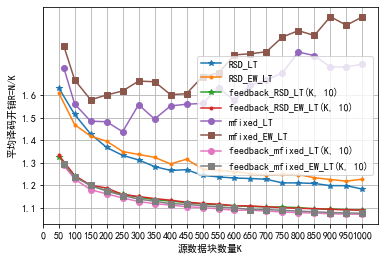

In [11]:
# EW_feedback方案对比
# 1. 与自身方案的非EW对比

# RSD_LT
df = pd.read_csv('./simulation/RSD_LT/K_10/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avgs = df['avgs']
overhead = [float(avgs[i]/K[i]) for i in range(len(K))]
# RSD_EW_LT
df1 = pd.read_csv('./simulation/RSD_EW_LT/drop改ew_drop后/K_10/EW_avgs_Mon_Dec_14_23_28_02_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/K1[i]) for i in range(K1.shape[0])]
# RSD_LT_feedback
df2 = pd.read_csv('simulation/RSD_LT/K_10/feedback_avgs_Sat_Dec__5_23_55_19_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in range(K2.shape[0])]
# RSD_EW_LT_feedback
df3 = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_10/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']
overhead3 = [float(avgs3[i]/K3[i]) for i in range(K3.shape[0])]

# mfixed_LT
df4 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_LT(K-avgs)_avgs_Tue_Dec_15_15_57_54_2020.csv')
K4 = df4['K']
avgs4 = df4['avgs']
overhead4 = [float(avgs4[i]/K4[i]) for i in range(len(K4))]
# mfixed_EW_LT
df5 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_EW_LT(K-avgs)_Tue_Dec_15_20_40_03_2020.csv')
K5 = df5['K']
avgs5 = df5['avgs']
overhead5 = [float(avgs5[i]/K5[i]) for i in range(len(K5))]
# mfixed_LT_feedback
df6 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_feedback_LT(K-avgs)_Tue_Dec_15_16_03_56_2020.csv')
K6 = df6['K']
avgs6 = df6['avgs']
overhead6 = [float(avgs6[i]/K6[i]) for i in range(len(K6))]
# mfixed_EW_LT_feedback
df7 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K7 = df7['K']
avgs7 = df7['avgs']
overhead7 = [float(avgs7[i]/K7[i]) for i in range(len(K7))]


plt.plot(K, overhead, marker='*', label='RSD_LT')
plt.plot(K1, overhead1, marker='.', label='RSD_EW_LT')
plt.plot(K2, overhead2, marker='*', label='feedback_RSD_LT(K, 10)')
plt.plot(K3, overhead3, marker='.', label='feedback_RSD_EW_LT(K, 10)')
plt.plot(K4, overhead4, marker='o', label='mfixed_LT')
plt.plot(K5, overhead5, marker='s', label='mfixed_EW_LT')
plt.plot(K6, overhead6, marker='o', label='feedback_mfixed_LT(K, 10)')
plt.plot(K7, overhead7, marker='s', label='feedback_mfixed_EW_LT(K, 10)')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(1+0.1, 1.7, 0.1))
plt.xlabel('源数据块数量K')
plt.ylabel('平均译码开销R=N/K')
plt.legend()
plt.grid()
plt.savefig('./simulation/论文多反馈UEP_LT方案/EW_feedback与自身非EW对比both'+ '.pdf')

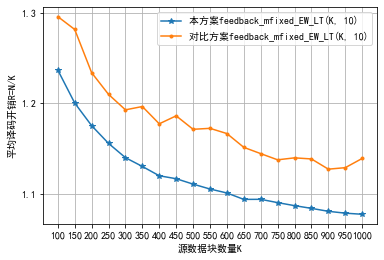

In [22]:
# EW_feedback方案对比
# 2. 与论文多反馈UEP_LT对比(译码开销)

# 本方案
# RSD_EW_LT_feedback
df = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_10/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K = df['K']
avgs = df['avgs']
overhead = [float(avgs[i]/K[i]) for i in range(K.shape[0])]
# mfixed_EW_LT_feedback
df1 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K1 = df1['K']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/K1[i]) for i in range(len(K1))]

# 对比方案
# RSD_EW_LT_feedback
df2 = pd.read_csv('simulation/论文多反馈UEP_LT方案/RSD/K_10/feedback_EW_avgs_Sun_Dec_27_17_22_34_2020.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in range(K2.shape[0])]
# mfixed_EW_LT_feedback
df3 = pd.read_csv('simulation/论文多反馈UEP_LT方案/mfixed/K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Sun_Dec_27_17_02_19_2020.csv')
K3 = df3['K']
avgs3 = df3['avgs']
overhead3 = [float(avgs3[i]/K3[i]) for i in range(K3.shape[0])]


# plt.plot(K, overhead, marker='*', label='本方案feedback_RSD_EW_LT(K, 10)')
plt.plot(K1, overhead1, marker='*', label='本方案feedback_mfixed_EW_LT(K, 10)')
# plt.plot(K2, overhead2, marker='.', label='对比方案feedback_RSD_EW_LT(K, 10)')
plt.plot(K3, overhead3, marker='.', label='对比方案feedback_mfixed_EW_LT(K, 10)')

plt.xticks(range(0+100, 1000+50, 50))
plt.yticks(np.arange(1+0.1, 1.4, 0.1))
plt.xlabel('源数据块数量K')
plt.ylabel('平均译码开销R=N/K')
plt.legend()
plt.grid()
plt.savefig('./simulation/论文多反馈UEP_LT方案/EW_feedback与论文方案对比mfixed'+ '.pdf')

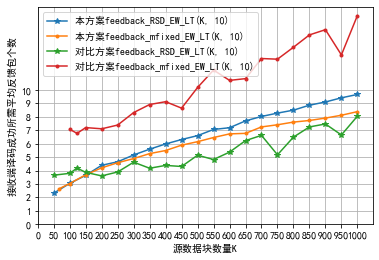

In [17]:
# EW_feedback方案对比
# 2. 与论文多反馈UEP_LT对比(反馈包数量)

# 本方案
# RSD_EW_LT_feedback
df = pd.read_csv('simulation/RSD_EW_LT/drop改ew_drop后/K_10/feedback_EW_avgs_Tue_Dec_15_00_25_05_2020.csv')
K = df['K']
avgs = df['feedback_packet_avgs']
# mfixed_EW_LT_feedback
df1 = pd.read_csv('simulation/mfixed/K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Tue_Dec_15_21_16_23_2020.csv')
K1 = df1['K']
avgs1 = df1['feedback_packet_avgs']

# 对比方案
# RSD_EW_LT_feedback
df2 = pd.read_csv('simulation/论文多反馈UEP_LT方案/RSD/K_10/feedback_EW_avgs_Sun_Dec_27_17_22_34_2020.csv')
K2 = df2['K']
avgs2 = df2['feedback_packet_avgs']
# mfixed_EW_LT_feedback
df3 = pd.read_csv('simulation/论文多反馈UEP_LT方案/mfixed/K_10/mfixed_degree_feedback_EW_LT(K-avgs)_Sun_Dec_27_17_02_19_2020.csv')
K3 = df3['K']
avgs3 = df3['feedback_packet_avgs']


plt.plot(K, avgs, marker='*', label='本方案feedback_RSD_EW_LT(K, 10)')
plt.plot(K1, avgs1, marker='.', label='本方案feedback_mfixed_EW_LT(K, 10)')
plt.plot(K2, avgs2, marker='*', label='对比方案feedback_RSD_EW_LT(K, 10)')
plt.plot(K3, avgs3, marker='.', label='对比方案feedback_mfixed_EW_LT(K, 10)')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(0, 10+1, 1))
plt.xlabel('源数据块数量K')
plt.ylabel('接收端译码成功所需平均反馈包个数')
plt.legend()
plt.grid()
plt.savefig('./simulation/论文多反馈UEP_LT方案/EW_feedback与论文方案对比(反馈包数量)both'+ '.pdf')

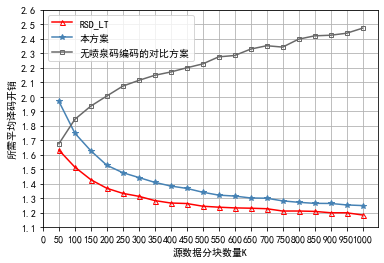

In [18]:
# EW(0.6, 0.6) real_feedback 开销对比

# RSD_LT
df = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/no_feedback/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avgs = df['avgs']
overhead = [float(avgs[i]/K[i]) for i in range(len(K))]
# RSD_EW_LT(w2)
df1 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/no_feedback/100次/EW_avgs_Mon_Jan__4_12_40_34_2021.csv')
K1 = df1['K']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/K1[i]) for i in range(K1.shape[0])]
# RSD_EW_LT (w1)
df9 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/feedback/w1done_30/记录w1和w2/feedback_RSD_EW_avgs_Thu_Jan_14_11_56_34_2021.csv')
K9 = df9['K']
avgs9 = df9['w1_avg_drops']
overhead9 = [float(avgs9[i]/K9[i]) for i in range(K9.shape[0])]

# real_feedback_RSD_EW_LT(0.8K_30)
df2 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/feedback/0.8K_30/feedback_RSD_EW_avgs_Wed_Jan__6_13_03_25_2021.csv')
K2 = df2['K']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/K2[i]) for i in range(K2.shape[0])]
# real_feedback_RSD_EW_LT(w1done_30)
df3 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/w1done_30/feedback_RSD_EW_avgs_Fri_Jan_22_17_41_03_2021.csv')
K3 = df3['K']
avgs3 = df3['w2_avg_drops']
overhead3 = [float(avgs3[i]/K3[i]) for i in range(K3.shape[0])]
# 反馈无延迟RSD_EW(0.6,0.6) w1done_30
df6 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/反馈无延迟(w1done_30)/feedback_EW_avgs_Wed_Jan__6_23_50_26_2021.csv')
K6 = df6['K']
avgs6 = df6['avgs']
overhead6 = [float(avgs6[i]/K6[i]) for i in range(K6.shape[0])]

# 循环发直到收完PER=0.04
df7 = pd.read_csv('simulation\直传循环发\PER=0.04\loopsend_avgs_Sun_Jan_10_22_37_06_2021.csv')
K7 = df7['K']
avgs7 = df7['avg_recv_drops']
overhead7 = [float(avgs7[i]/K7[i]) for i in range(K7.shape[0])]


# EW(0.6,0.5)
df8 = pd.read_csv('simulation/EW(0.6, 0.5)/no_feedback/EW_avgs_Mon_Jan_11_02_11_54_2021.csv')
K8 = df8['K']
avgs8 = df8['avgs']
overhead8 = [float(avgs8[i]/K8[i]) for i in range(K8.shape[0])]


plt.plot(K, overhead, marker='^', label='RSD_LT', color='red', markersize=5, markerfacecolor='none')
# plt.plot(K1, overhead1, marker='o', label='RSD_EW_LT(0.6,0.6)', color='darkorange', linestyle='-', linewidth = '1', markersize=5)
# plt.plot(K2, overhead2, marker='*', label='feedback(0.8K_30)_RSD_EW_LT(0.6,0.6)')
# plt.plot(K6, overhead6, marker='.', label='理想无延迟反馈(w1done,3s) RSD_EW_LT(0.6,0.6)', color='green')
# plt.plot(K3, overhead3, marker='*', label='水声反馈(w1done,3s) RSD_EW_LT(0.6,0.6)', color='steelblue')
plt.plot(K3, overhead3, marker='*', label='本方案', color='steelblue')
plt.plot(K7, overhead7, marker='s', label='无喷泉码编码的对比方案', color='dimgray',markersize=4, markerfacecolor='none')
# plt.plot(K8, overhead8, marker='.', label='RSD_EW_LT(0.6,0.5)')
# plt.plot(K9, overhead9, marker='*', label='RSD_EW_LT(0.6,0.6)译出w1窗口', color='blue')

# 画曲线模板
# plt.plot(x, y, linewidth = '1', label = "test", color=' coral ', linestyle=':', marker='|')
# plt.legend(loc='upper left')
# plt.show()

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(1.1, 2.7, 0.1))
plt.xlabel('源数据分块数量K')
plt.ylabel('所需平均译码开销')
plt.legend()
plt.grid()
plt.savefig('simulation/5-19'+ '.png', dpi=600)

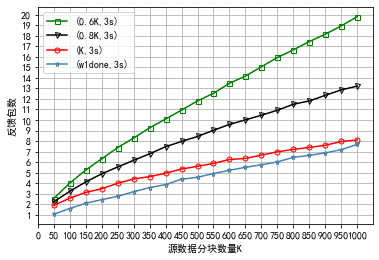

In [22]:
# EW(0.6, 0.6) real_feedback 反馈方案的选择     开销和反馈包数

# 0.8K_30
df = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/0.8K_30/feedback_RSD_EW_avgs_Fri_Jan_22_12_48_12_2021.csv')
K = df['K']
w1_avg = df['w1_avg_drops']
w2_avg = df['w2_avg_drops']
w1_overhead = [float(w1_avg[i]/K[i]) for i in range(len(K))]
w2_overhead = [float(w2_avg[i]/K[i]) for i in range(len(K))]
fb = df['feedback_packet_avgs']
# K_30
df1 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/K_30/feedback_RSD_EW_avgs_Fri_Jan_22_14_18_01_2021.csv')
K1 = df1['K']
w1_avg1 = df1['w1_avg_drops']
w2_avg1 = df1['w2_avg_drops']
w1_overhead1 = [float(w1_avg1[i]/K1[i]) for i in range(len(K1))]
w2_overhead1 = [float(w2_avg1[i]/K1[i]) for i in range(len(K1))]
fb1 = df1['feedback_packet_avgs']
# w1done_30
df2 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/w1done_30/feedback_RSD_EW_avgs_Fri_Jan_22_17_41_03_2021.csv')
K2 = df2['K']
w1_avg2 = df2['w1_avg_drops']
w2_avg2 = df2['w2_avg_drops']
w1_overhead2 = [float(w1_avg2[i]/K2[i]) for i in range(len(K2))]
w2_overhead2 = [float(w2_avg2[i]/K2[i]) for i in range(len(K2))]
fb2 = df2['feedback_packet_avgs']
# 0.7K_30
df3 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/0.7K_30/feedback_RSD_EW_avgs_Fri_Jan_22_19_52_31_2021.csv')
K3 = df3['K']
w1_avg3 = df3['w1_avg_drops']
w2_avg3 = df3['w2_avg_drops']
w1_overhead3 = [float(w1_avg3[i]/K3[i]) for i in range(len(K3))]
w2_overhead3 = [float(w2_avg3[i]/K3[i]) for i in range(len(K3))]
fb3 = df3['feedback_packet_avgs']
# 0.6K_30
df4 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/0.6K_30/feedback_RSD_EW_avgs_Fri_Jan_22_19_51_56_2021.csv')
K4 = df4['K']
w1_avg4 = df4['w1_avg_drops']
w2_avg4 = df4['w2_avg_drops']
w1_overhead4 = [float(w1_avg4[i]/K4[i]) for i in range(len(K4))]
w2_overhead4 = [float(w2_avg4[i]/K4[i]) for i in range(len(K4))]
fb4 = df4['feedback_packet_avgs']
# 0.5K_30
df5 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/0.5K_30/feedback_RSD_EW_avgs_Fri_Jan_22_22_02_53_2021.csv')
K5 = df5['K']
w1_avg5 = df5['w1_avg_drops']
w2_avg5 = df5['w2_avg_drops']
w1_overhead5 = [float(w1_avg5[i]/K5[i]) for i in range(len(K5))]
w2_overhead5 = [float(w2_avg5[i]/K5[i]) for i in range(len(K5))]
fb5 = df5['feedback_packet_avgs']

# mfixed w1done_30
df6 = pd.read_csv('simulation/EW(0.6, 0.6)/mfixed/水声反馈/w1done_30/feedback_mfixed_EW_avgs_Sat_Jan_23_19_15_27_2021.csv')
K6 = df6['K']
w1_avg6 = df6['w1_avg_drops']
w2_avg6 = df6['w2_avg_drops']
w1_overhead6 = [float(w1_avg6[i]/K6[i]) for i in range(len(K6))]
w2_overhead6 = [float(w2_avg6[i]/K6[i]) for i in range(len(K6))]
fb6 = df6['feedback_packet_avgs']

# 译码开销
# plt.plot(K5, w1_overhead5, marker='', label='(0.5K,30)w1')
# plt.plot(K5, w2_overhead5, marker='', label='(0.5K,30)w2')
# plt.plot(K4, w1_overhead4, marker='s', label='(0.6K,3s)w1',color='green', markersize=5, markerfacecolor='none', linestyle='--')
# plt.plot(K4, w2_overhead4, marker='s', label='(0.6K,3s)w2',color='green', markersize=5, markerfacecolor='none')
# # plt.plot(K3, w1_overhead3, marker='', label='(0.7K,30)w1')
# # # plt.plot(K3, w2_overhead3, marker='', label='(0.7K,30)w2')
# plt.plot(K, w1_overhead, marker='v', label='(0.8K,3s)w1',color='black', markersize=5, markerfacecolor='none', linestyle='--')
# plt.plot(K, w2_overhead, marker='v', label='(0.8K,3s)w2',color='black', markersize=5, markerfacecolor='none')
# plt.plot(K1, w1_overhead1, marker='o', label='(K,3s)w1',color='red', markersize=5, markerfacecolor='none', linestyle='--')
# plt.plot(K1, w2_overhead1, marker='o', label='(K,3s)w2',color='red', markersize=5, markerfacecolor='none')
# plt.plot(K2, w1_overhead2, marker='*', label='(w1done,3s)w1', color='steelblue', markersize=5, markerfacecolor='none', linestyle='--')
# plt.plot(K2, w2_overhead2, marker='*', label='(w1done,3s)w2', color='steelblue',markersize=5, markerfacecolor='none')
# plt.plot(K6, w1_overhead6, marker='v', label='mfixed(w1done,30)w1', color='green', markersize=5, markerfacecolor='none')
# plt.plot(K6, w2_overhead6, marker='*', label='mfixed(w1done,30)w2', color='green',markersize=5, markerfacecolor='none')

# 反馈包数
# plt.plot(K5, fb5, marker='', label='(0.5K,30)')
plt.plot(K4, fb4, marker='s', label='(0.6K,3s)',color='green', markersize=5, markerfacecolor='none')
# # plt.plot(K3, fb3, marker='', label='(0.7K,30)')
plt.plot(K, fb, marker='v', label='(0.8K,3s)', color='black', markersize=5, markerfacecolor='none')
plt.plot(K1, fb1, marker='o', label='(K,3s)', color='red', markersize=5, markerfacecolor='none')
plt.plot(K2, fb2, marker='*', label='(w1done,3s)', color='steelblue', markersize=5, markerfacecolor='none')
# plt.plot(K6, fb6, marker='*', label='mfixed_w1done_30', color='green', markersize=5, markerfacecolor='none')


# plt.xticks(range(0, 1000+50, 50))
# plt.yticks(np.arange(1.0, 2.2, 0.1))
# plt.xlabel('源数据分块数量K')
# plt.ylabel('所需平均译码开销R')
# plt.legend()
# plt.grid()
# plt.savefig('simulation/5-6'+ '.png', dpi=600)

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(1.0, 21.0, 1))
plt.xlabel('源数据分块数量K')
plt.ylabel('反馈包数')
plt.legend()
plt.grid()
plt.savefig('simulation/5-7'+ '.png', dpi=600)

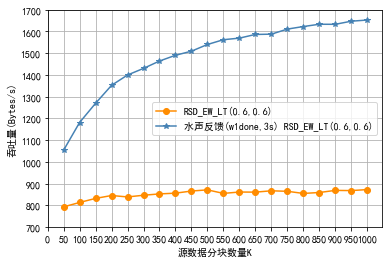

In [9]:
# EW(0.6, 0.6) real_feedback 吞吐量对比

# RSD_LT
df = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/no_feedback/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avg_send_drops = df['avg_send_drops']
ttl = [float(K[i]*215/(avg_send_drops[i]*0.1)) for i in range(K.shape[0])]
# RSD_EW_LT 
df3 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/no_feedback/100次/EW_avgs_Mon_Jan__4_12_40_34_2021.csv')
K3 = df3['K']
avgs3 = df3['avgs']
ttl3 = [float((K3[i]*215)/((avgs3[i]/0.96)*0.1)) for i in range(K3.shape[0])]
# real_feedback_RSD_EW_LT(w1done_30)
df1 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/w1done_30/feedback_RSD_EW_avgs_Fri_Jan_22_17_41_03_2021.csv')
K1 = df1['K']
avg_w2_drops1 = df1['w2_avg_drops']
ttl1 = [float(K1[i]*215/(round(avg_w2_drops1[i]/0.96)*0.1)) for i in range(K1.shape[0])]

# 反馈无延迟RSD_EW(0.6,0.6) w1done_30
df2 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/反馈无延迟(w1done_30)/feedback_EW_avgs_Wed_Jan__6_23_50_26_2021.csv')
K2 = df2['K']
avgs2 = df2['avgs']
ttl2 = [float((K2[i]*215)/((avgs2[i]/0.96)*0.1)) for i in range(K2.shape[0])]


# plt.plot(K, ttl, marker='.', label='RSD_LT')
plt.plot(K3, ttl3, marker='o', label='RSD_EW_LT(0.6,0.6)', color='darkorange')
# plt.plot(K2, ttl2, marker='.', label='理想无延迟反馈 RSD_EW_LT(0.6,0.6)', color='green', linewidth = 1)
plt.plot(K1, ttl1, marker='*', label='水声反馈(w1done,3s) RSD_EW_LT(0.6,0.6)', color='steelblue')


plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(700, 1800, 100))
plt.xlabel('源数据分块数量K')
plt.ylabel('吞吐量(Bytes/s)')
plt.legend()
plt.grid()
plt.savefig('simulation/5-10'+ '.png', dpi=600)

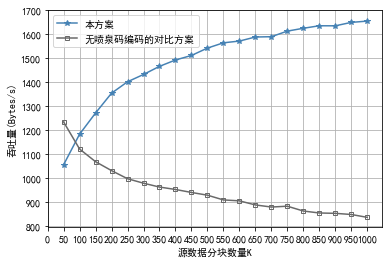

In [17]:
# EW(0.6, 0.6) real_feedback 吞吐量 对比

# RSD_LT
df = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/no_feedback/avgs_Sat_Dec__5_23_10_47_2020.csv')
K = df['K']
avg_send_drops = df['avg_send_drops']
time = [float(avg_send_drops[i]*0.1) for i in range(K.shape[0])]
ttl = [float(K[i]*215/(avg_send_drops[i]*0.1)) for i in range(K.shape[0])]


# real_feedback_RSD_EW_LT(w1done_30)
df1 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/w1done_30/feedback_RSD_EW_avgs_Fri_Jan_22_17_41_03_2021.csv')
K1 = df1['K']
w2_avg_drops1 = df1['w2_avg_drops']
time1 = [float(w2_avg_drops1[i]*0.1) for i in range(K1.shape[0])]
ttl1 = [float(K1[i]*215/(round(w2_avg_drops1[i]/0.96)*0.1)) for i in range(K1.shape[0])]


# 循环发直到收完PER=0.04
df2 = pd.read_csv('simulation\直传循环发\PER=0.04\loopsend_avgs_Sun_Jan_10_22_37_06_2021.csv')
K2 = df2['K']
avg_send_drops2 = df2['avg_send_drops']
time2 = [float(avg_send_drops2[i]*0.1) for i in range(K2.shape[0])]
ttl2 = [float(K2[i]*215/(avg_send_drops2[i]*0.1)) for i in range(K2.shape[0])]



# plt.plot(K, ttl, marker='.', label='RSD_LT')
plt.plot(K1, ttl1, marker='*', label='本方案', color='steelblue')
plt.plot(K2, ttl2, marker='s', label='无喷泉码编码的对比方案', color='dimgray',markersize=4, markerfacecolor='none')

plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(800, 1800, 100))
plt.xlabel('源数据分块数量K')
plt.ylabel('吞吐量(Bytes/s)')
plt.legend()
plt.grid()
plt.savefig('simulation/5-20'+ '.png', dpi=600)

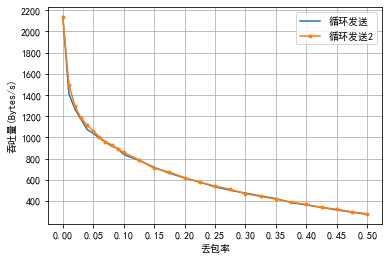

In [43]:
# 不同PER对喷泉码和循环发的影响 K=115

# 循环发送
df = pd.read_csv('simulation\直传循环发\K=115(不同PER)\loopsend_avgs_Wed_Jan_13_20_33_24_2021.csv')
per = df['per']
avgs_recv = df['avg_recv_drops']
avgs_send = df['avg_send_drops']
overhead = [float(avgs_recv[i]/115) for i in range(len(per))]
ttl = [float(24600/(avgs_send[i]*0.1)) for i in range(len(per))]

# 循环发送2
df3 = pd.read_csv('simulation\直传循环发\K=115(不同PER)\loopsend_avgs_Wed_Jan_13_22_15_49_2021.csv')
per3 = df3['per']
avgs_recv3 = df3['avg_recv_drops']
avgs_send3 = df3['avg_send_drops']
overhead3 = [float(avgs_recv3[i]/115) for i in range(per3.shape[0])]
ttl3 = [float(24600/(avgs_send3[i]*0.1)) for i in range(len(per3))]

# 译码开销
# plt.plot(per, overhead, marker='', label='循环发送')
# plt.plot(per3, overhead3, marker='.', label='循环发送2')

# 吞吐量
plt.plot(per, ttl, marker='', label='循环发送')
plt.plot(per3, ttl3, marker='.', label='循环发送2')

plt.xticks(np.arange(0.0, 0.5+0.05, 0.05))
plt.yticks(np.arange(400, 2200+100, 200))
plt.xlabel('丢包率')
plt.ylabel('吞吐量(Bytes/s)')
plt.legend()
plt.grid()


# plt.xticks(np.arange(0.0, 0.5+0.05, 0.05))
# plt.yticks(np.arange(1.0, 5.0, 0.5))
# plt.xlabel('丢包率')
# plt.ylabel('所需开销')
# plt.legend()
# plt.grid()

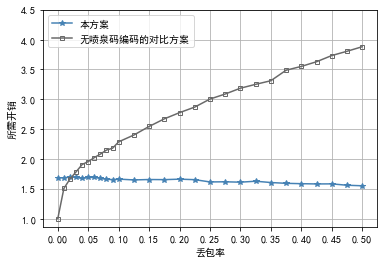

In [21]:
# 不同PER对喷泉码和循环发的影响 K=115

# 循环发送
df = pd.read_csv('simulation\直传循环发\K=115(不同PER)\loopsend_avgs_Wed_Jan_13_20_33_24_2021.csv')
per = df['per']
avgs_recv = df['avg_recv_drops']
avgs_send = df['avg_send_drops']
overhead = [float(avgs_recv[i]/115) for i in range(len(per))]
ttl = [float(24600/(avgs_send[i]*0.1)) for i in range(len(per))]
# RSD_LT
df1 = pd.read_csv('simulation\PER对喷泉码的影响\RSD_LT_avgs_Wed_Jan_13_15_47_51_2021.csv')
per1 = df1['per']
avgs1 = df1['avgs']
overhead1 = [float(avgs1[i]/115) for i in range(per1.shape[0])]
ttl1 = [float(24600/(avgs1[i]*0.1)) for i in range(len(per1))]
# RSD_EW_LT
df2 = pd.read_csv('simulation\PER对喷泉码的影响\RSD_EW_LT_avgs_Wed_Jan_13_16_02_42_2021.csv')
per2 = df2['per']
avgs2 = df2['avgs']
overhead2 = [float(avgs2[i]/115) for i in range(per2.shape[0])]
ttl2 = [float(24600/(avgs2[i]*0.1)) for i in range(len(per2))]
# feedback_RSD_EW_LT
df3 = pd.read_csv('simulation/PER对喷泉码的影响/画吞吐量/feedback_RSD_EW_avgs_Sun_Jan_17_17_24_38_2021.csv')
per3 = df3['per']
avgs_recv3 = df3['avg_recv_drops']
avgs_send3 = df3['avg_send_drops']
overhead3 = [float(avgs_recv3[i]/115) for i in range(per3.shape[0])]
ttl3 = [float(24600/(avgs_send3[i]*0.1)) for i in range(len(per3))]

df4 = pd.read_csv('simulation/PER对喷泉码的影响/画吞吐量/feedback_RSD_EW_avgs_Sat_Feb__6_21_56_59_2021.csv')
per4 = df4['per']
avgs_recv4 = df4['avg_recv_drops']
avgs_send4 = df4['avg_send_drops']
overhead4 = [float(avgs_recv4[i]/115) for i in range(per4.shape[0])]
ttl4 = [float(24600/(avgs_send4[i]*0.1)) for i in range(len(per4))]

# k=500 反馈包间隔30
df5 = pd.read_csv('simulation\PER对喷泉码的影响\画吞吐量\(包间隔30反馈K=500)feedback_RSD_EW_avgs_Fri_Mar_26_15_04_00_2021.csv')
per5 = df5['per']
avgs_recv5 = df5['avg_recv_drops']
avgs_send5 = df5['avg_send_drops']
overhead5 = [float(avgs_recv5[i]/500) for i in range(per5.shape[0])]
ttl5 = [float(24600/(avgs_send5[i]*0.1)) for i in range(len(per5))]

# k=115 定时3s反馈
df6 = pd.read_csv('simulation\PER对喷泉码的影响\画吞吐量\(定时3s反馈K=115)feedback_RSD_EW_avgs_Fri_Mar_26_17_23_43_2021.csv')
per6 = df6['per']
avgs_recv6 = df6['avg_recv_drops']
avgs_send6 = df6['avg_send_drops']
overhead6 = [float(avgs_recv6[i]/115) for i in range(per6.shape[0])]
ttl6 = [float(24600/(avgs_send6[i]*0.1)) for i in range(len(per6))]

# k=500 定时3s反馈
df7 = pd.read_csv('simulation\PER对喷泉码的影响\画吞吐量\(定时3s反馈K=500)feedback_RSD_EW_avgs_Fri_Mar_26_20_53_28_2021.csv')
per7 = df7['per']
avgs_recv7 = df7['avg_recv_drops']
avgs_send7 = df7['avg_send_drops']
overhead7 = [float(avgs_recv7[i]/500) for i in range(per7.shape[0])]
ttl7 = [float(196662/(avgs_send7[i]*0.1)) for i in range(len(per7))]



# 译码开销
# plt.plot(per1, overhead1, marker='.', label='RSD_LT')
# plt.plot(per3, overhead3, marker=',', label='k=115（之前）')
plt.plot(per6, overhead6, marker='*', label='本方案', color='steelblue')
# plt.plot(per5, overhead5, marker='.', label='本方案k=500', color='steelblue')
plt.plot(per, overhead, marker='s', label='无喷泉码编码的对比方案', color='dimgray',markersize=4, markerfacecolor='none')
# plt.plot(per5, overhead5, marker='*', label='包间隔30反馈本方案k=500', color='red')
# plt.plot(per6, overhead6, marker='.', label='定时3s反馈本方案k=115', color='red')


# 吞吐量
# plt.plot(per4, ttl4, marker='*', label='本方案', color='steelblue')
# plt.plot(per6, ttl6, marker='*', label='本方案', color='steelblue')
# # plt.plot(per2, ttl2, marker='.', label='RSD_EW_LT(0.6,0.6)')
# plt.plot(per, ttl, marker='s', label='无喷泉码编码的对比方案', color='dimgray',markersize=4, markerfacecolor='none')


plt.xticks(np.arange(0.0, 0.5+0.05, 0.05))
plt.yticks(np.arange(1.0, 5.0, 0.5))
plt.xlabel('丢包率')
plt.ylabel('所需开销')
plt.legend()
plt.grid()
plt.savefig('simulation/5-21'+ '.png', dpi=600)

# plt.xticks(np.arange(0.0, 0.5+0.05, 0.05))
# plt.yticks(np.arange(300, 2200+100, 200))
# plt.xlabel('丢包率')
# plt.ylabel('吞吐量(Bytes/s)')
# plt.legend()
# plt.grid()
# plt.savefig('simulation/5-22'+ '.png', dpi=600)

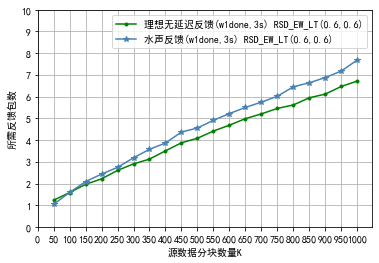

In [11]:
# EW(0.6, 0.6) real_feedback 反馈包数对比

# real_feedback_RSD_EW_LT(0.8K_30)
df2 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/feedback/0.8K_30/feedback_RSD_EW_avgs_Wed_Jan__6_13_03_25_2021.csv')
K2 = df2['K']
fb2 = df2['feedback_packet_avgs']

# real_feedback_RSD_EW_LT(w1done_30)
df3 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/水声反馈/w1done_30/feedback_RSD_EW_avgs_Fri_Jan_22_17_41_03_2021.csv')
K3 = df3['K']
fb3 = df3['feedback_packet_avgs']

# 无延迟feedback_RSD_EW_LT(w1done_30)
df4 = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/反馈无延迟(w1done_30)/feedback_EW_avgs_Wed_Jan__6_23_50_26_2021.csv')
K4 = df4['K']
fb4 = df4['feedback_packet_avgs']

# plt.plot(K2, fb2, marker='.', label='水声反馈feedback(0.8K,30)_RSD_EW_LT(0.6,0.6)')
plt.plot(K4, fb4, marker='.', label='理想无延迟反馈(w1done,3s) RSD_EW_LT(0.6,0.6)', color='green')
plt.plot(K3, fb3, marker='*', label='水声反馈(w1done,3s) RSD_EW_LT(0.6,0.6)', color='steelblue')


plt.xticks(range(0, 1000+50, 50))
plt.yticks(np.arange(0, 11, 1))
plt.xlabel('源数据分块数量K')
plt.ylabel('所需反馈包数')
plt.legend()
plt.grid()
plt.savefig('simulation/5-12'+ '.png', dpi=600)


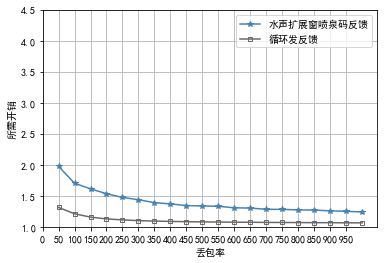

In [178]:
# 水声扩展窗喷泉码反馈 vs 循环发反馈 对比
# 不同K，per=0.04

# 水声扩展窗喷泉码反馈
df = pd.read_csv('simulation/EW(0.6, 0.6)/RSD/feedback\w1done_30/feedback_RSD_EW_avgs_Wed_Jan__6_17_01_43_2021.csv')
K = df['K']
avgs_recv = df['avgs']
avgs_send = df['avg_send_drops']
overhead = [float(avgs_recv[i]/K[i]) for i in range(len(K))]

# 循环发反馈
df1 = pd.read_csv('simulation/直传循环发/有反馈/PER=0.04/loopsend_avgs_Sat_Jan_16_22_45_53_2021.csv')
K1 = df1['K']
avgs_recv1 = df1['avg_recv_drops']
avgs_send1 = df1['avg_send_drops']
overhead1 = [float(avgs_recv1[i]/K1[i]) for i in range(len(K1))]

# 译码开销
plt.plot(K, overhead, marker='*', label='水声扩展窗喷泉码反馈', color='steelblue')
plt.plot(K1, overhead1, marker='s', label='循环发反馈', color='dimgray',markersize=4, markerfacecolor='none')

plt.xticks(np.arange(0.0, 1000, 50))
plt.yticks(np.arange(1.0, 5.0, 0.5))
plt.xlabel('丢包率')
plt.ylabel('所需开销')
plt.legend()
plt.grid()
plt.savefig('simulation/EW(0.6, 0.6)/水声扩展窗喷泉码反馈vs循环发反馈-开销'+ '.pdf')

# 开始反馈点、反馈间隔都不一样
# 有无不平等差错保护


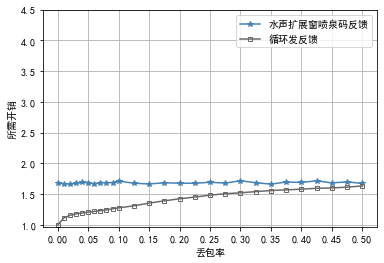

In [180]:
# 水声扩展窗喷泉码反馈 vs 循环发反馈 对比
# 不同per，K=115

# 水声扩展窗喷泉码反馈
df = pd.read_csv('simulation/PER对喷泉码的影响/画吞吐量/feedback_RSD_EW_avgs_Sun_Jan_17_17_24_38_2021.csv')
per = df['per']
avgs_recv = df['avg_recv_drops']
avgs_send = df['avg_send_drops']
overhead = [float(avgs_recv[i]/115) for i in range(len(per))]

# 循环发反馈
df1 = pd.read_csv('simulation\直传循环发\有反馈\K=115(不同PER)\loopsend_avgs_Sun_Jan_17_10_11_24_2021.csv')
per1 = df1['per']
avgs_recv1 = df1['avg_recv_drops']
avgs_send1 = df1['avg_send_drops']
overhead1 = [float(avgs_recv1[i]/115) for i in range(len(per1))]

# 译码开销
plt.plot(per, overhead, marker='*', label='水声扩展窗喷泉码反馈', color='steelblue')
plt.plot(per1, overhead1, marker='s', label='循环发反馈', color='dimgray',markersize=4, markerfacecolor='none')

plt.xticks(np.arange(0.0, 0.5+0.05, 0.05))
plt.yticks(np.arange(1.0, 5.0, 0.5))
plt.xlabel('丢包率')
plt.ylabel('所需开销')
plt.legend()
plt.grid()
plt.savefig('simulation/EW(0.6, 0.6)/水声扩展窗喷泉码反馈vs循环发反馈(K=115不同PER)-开销'+ '.pdf')

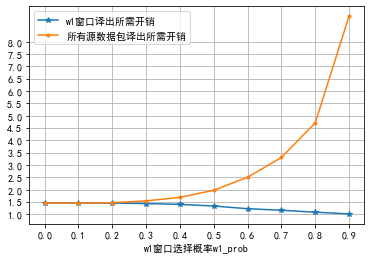

In [16]:
# EW(0.6) w1_pro选取

# RSD无反馈
df = pd.read_csv('simulation/w1_pro选择/RSD无反馈/EW_RSD(w1_size=0.6)_avgs_Tue_Jan__5_16_33_44_2021.csv')
w1_pro = df['w1_pro']
w1_avgs = df['w1_avgs']
w2_avgs = df['w2_avgs']
w1_overhead = [float(w1_avgs[i]/115) for i in range(len(w1_pro))]
w2_overhead = [float(w2_avgs[i]/115) for i in range(len(w1_pro))]

# RSD有反馈(0.8K_30)
df1 = pd.read_csv('simulation/w1_pro选择/RSD反馈(0.8K_30)/feedback_EW_RSD(w1_size=0.6)_avgs_Wed_Jan__6_22_01_21_2021.csv')
w1_pro1 = df1['w1_pro']
w1_avgs1 = df1['w1_avgs']
w2_avgs1 = df1['w2_avgs']
w1_overhead1 = [float(w1_avgs1[i]/115) for i in range(len(w1_pro1))]
w2_overhead1 = [float(w2_avgs1[i]/115) for i in range(len(w1_pro1))]
# RSD有反馈(w1done_30)
df2 = pd.read_csv('simulation/w1_pro选择/mfixed反馈(w1done_30)/feedback_EW_mfixed(w1_size=0.6)_avgs_Sat_Jan_23_17_22_49_2021.csv')
w1_pro2 = df2['w1_pro']
w1_avgs2 = df2['w1_avgs']
w2_avgs2 = df2['w2_avgs']
w1_overhead2 = [float(w1_avgs2[i]/115) for i in range(len(w1_pro2))]
w2_overhead2 = [float(w2_avgs2[i]/115) for i in range(len(w1_pro2))]
# RSD有反馈(0.7K_30)
df3 = pd.read_csv('simulation/w1_pro选择/RSD反馈(0.7K_30)/feedback_EW_RSD(w1_size=0.6)_avgs_Tue_Jan_12_10_52_12_2021.csv')
w1_pro3 = df3['w1_pro']
w1_avgs3 = df3['w1_avgs']
w2_avgs3 = df3['w2_avgs']
w1_overhead3 = [float(w1_avgs3[i]/115) for i in range(len(w1_pro3))]
w2_overhead3 = [float(w2_avgs3[i]/115) for i in range(len(w1_pro3))]
# RSD有反馈(0.6K_30)
df4 = pd.read_csv('simulation/w1_pro选择/RSD反馈(0.6K_30)/feedback_EW_RSD(w1_size=0.6)_avgs_Tue_Jan_12_11_04_33_2021.csv')
w1_pro4 = df4['w1_pro']
w1_avgs4 = df4['w1_avgs']
w2_avgs4 = df4['w2_avgs']
w1_overhead4 = [float(w1_avgs4[i]/115) for i in range(len(w1_pro4))]
w2_overhead4 = [float(w2_avgs4[i]/115) for i in range(len(w1_pro4))]

# 包数
# plt.plot(w1_pro2, w1_avgs2, marker='*', label='w1窗口译出所需包数')
# plt.plot(w1_pro2, w2_avgs2, marker='.', label='所有数据块译出所需包数')

# 开销
plt.plot(w1_pro, w1_overhead, marker='*', label='w1窗口译出所需开销')
plt.plot(w1_pro, w2_overhead, marker='.', label='所有源数据包译出所需开销')

# plt.xticks(np.arange(0.0, 0.9+0.1, 0.1))
# plt.yticks(np.arange(0, 1000, 50))
# plt.xlabel('w1窗口选择概率p')
# plt.ylabel('')
# plt.legend()
# plt.grid()
# plt.savefig('simulation/w1_pro选择/w1_pro选择(RSD有反馈w1done_30)'+ '.pdf')

plt.xticks(np.arange(0.0, 0.9+0.1, 0.1))
plt.yticks(np.arange(0+1.0, 8.5, 0.5))
plt.xlabel('w1窗口选择概率w1_prob')
plt.ylabel('')
plt.legend()
plt.grid()
plt.savefig('simulation/5-16'+ '.png', dpi=600)

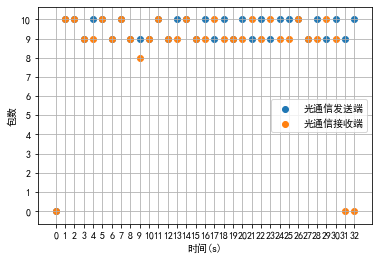

In [7]:
# 实验吞吐量曲线

# nofeedback
time = [ii for ii in range(33)]
send = [10,10,9,10,10,9,10,9,9,9,10,9,10,10,9,10,9,10,9,10,9,10,9,10,10,10,9,10,9,10,9,10]
recv = [10,10,9,9,10,9,10,9,8,9,10,9,9,10,9,9,10,9,9,9,10,9,10,9,9,10,9,9,10,9,0,0] 
plt.scatter(time, send, label='光通信发送端')
plt.scatter(time, recv, label='光通信接收端')


plt.xticks(np.arange(0.0, 33, 1.0))
plt.yticks(np.arange(0.0, 11.0, 1.0))
plt.xlabel('时间(s)')
plt.ylabel('包数')
plt.legend()
plt.grid()
plt.savefig('simulation/实验吞吐量/nofeedback'+ '.pdf')

No handles with labels found to put in legend.


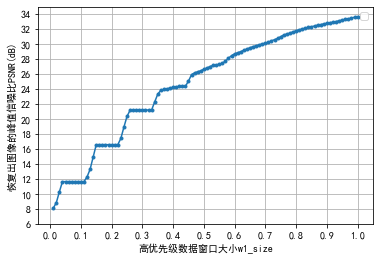

In [14]:
# psnr
df = pd.read_csv('simulation\progressive\processing\lena\psnr.csv')
w1_size = df['w1_size']
psnr = df['psnr']

plt.plot(w1_size, psnr, marker='.', label='')

plt.xticks(np.arange(0.0, 1.0+0.1, 0.1))
plt.yticks(np.arange(6, 35, 2))
plt.xlabel('高优先级数据窗口大小w1_size')
plt.ylabel('恢复出图像的峰值信噪比PSNR(dB)')
plt.legend()
plt.grid()
plt.savefig('simulation/5-14'+ '.png', dpi=600)

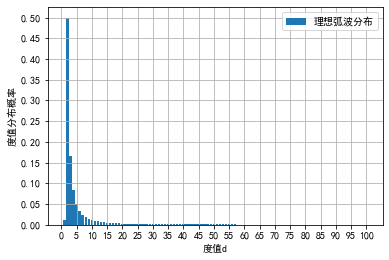

2.2802707378626246


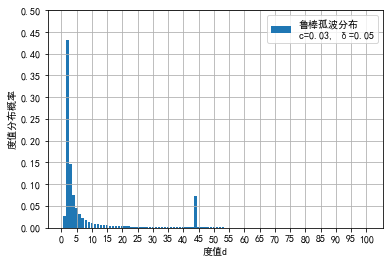

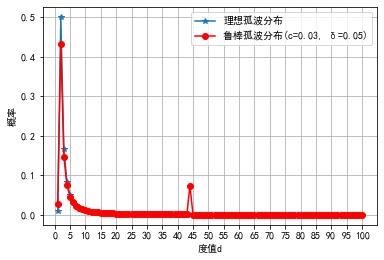

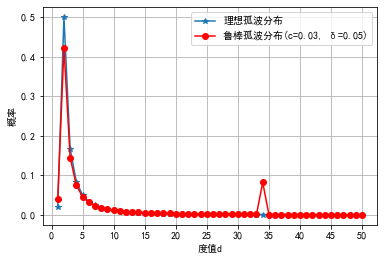

In [4]:
K =100
k = range(1, K+1, 1)
N = 100000

def all_at_once_solition(K):
    d = [ii + 1 for ii in range(K)]
    d_f = [1.0 if ii==1 else 0 for ii in d]
    plt.plot(d, d_f, marker="*", label='度1分布')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 0.55, 0.05))

    plt.xlabel('度值d')
    plt.ylabel('度值分布概率')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/all_at_once.pdf')
    plt.show()    
   

def soliton(K):
    ''' 理想弧波函数 '''
    d = [ii + 1 for ii in range(K)]
    d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    plt.bar(d, d_f, label='理想弧波分布')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 0.55, 0.05))
    plt.xlabel('度值d')
    plt.ylabel('度值分布概率')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/soliton.png', dpi=600)
    plt.show()

def robust_soliton(K, c = 0.03, delta = 0.05):
    ''' 鲁棒理想弧波函数 '''
    d = [ii + 1 for ii in range(K)]
    soliton_d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    S = c * log(K / delta) * (K ** 0.5)
    print(S)
    interval_0 = [ii + 1 for ii in list(range(int(round(K / S)) - 1))]
    interval_1 = [int(round(K / S))]
    tau = [S / (K * dd) if dd in interval_0 
            else S / float(K) * log(S / delta) if dd in interval_1
            else 0 for dd in d]
    Z = sum([soliton_d_f[ii] + tau[ii] for ii in range(K)])
    u_d_f = [(soliton_d_f[ii] + tau[ii]) / Z for ii in range(K)]
    plt.bar(d, u_d_f, label='鲁棒孤波分布\nc=0.03, δ=0.05')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 0.55, 0.05))
    plt.xlabel('度值d')
    plt.ylabel('度值分布概率')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/robust_soliton.png', dpi=600)
    plt.show()

# c = 0.03, delta = 0.05
def plot_both(K, c, delta):
    ''' 鲁棒理想弧波函数 '''
    d = [ii + 1 for ii in range(K)]
    soliton_d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    S = c * log(K / delta) * (K ** 0.5)
    interval_0 = [ii + 1 for ii in list(range(int(round(K / S)) - 1))]
    interval_1 = [int(round(K / S))]
    tau = [S / (K * dd) if dd in interval_0 
            else S / float(K) * log(S / delta) if dd in interval_1
            else 0 for dd in d]
    Z = sum([soliton_d_f[ii] + tau[ii] for ii in range(K)])
    u_d_f = [(soliton_d_f[ii] + tau[ii]) / Z for ii in range(K)]
    
    
    d_f = [1.0 / K if ii == 1 else 1.0 / (ii * (ii - 1)) for ii in d]
    plt.plot(d, d_f, marker="*", label='理想孤波分布')
    
    plt.plot(d, u_d_f, marker="o", color = "r", label='鲁棒孤波分布(c=0.03, δ=0.05)')
    plt.xticks(range(0, K + 5, 5))
    plt.yticks(np.arange(0, 0.6, 0.1))

    plt.xlabel('度值d')
    plt.ylabel('概率')
    plt.legend()
    plt.grid()
    plt.savefig('./simulation/plot_both_K_'+str(K)+'.svg', dpi=600)
    plt.show()    

soliton(100)
robust_soliton(100)
plot_both(100, 0.03, 0.05)
plot_both(50, 0.03, 0.05)
# plot_both(100, 0.003, 0.005)
# plot_both(100, 0.003, 0.5)
    

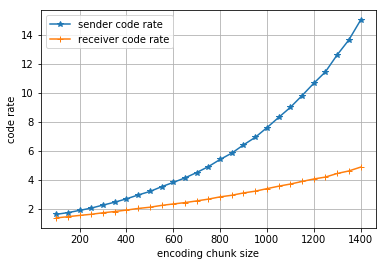

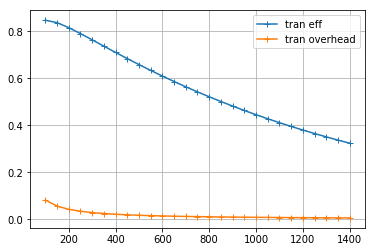

In [110]:
header = 9
net_overhead = [header * ii for ii in df1['drops_num']]
chunk_size = list(df1['size'])
size_all = [header + ii for ii in df1['size']]
size_d = df1['size']
drop_num = df1['drops_num']
PER = df1['PER']

decode_need = [df1['drops_num'][ii] * df1['size'][ii] / df1['code_rate'][ii] for ii in range(df1.shape[0])]

tran_send_all = [size_all[ii] * drop_num[ii] / (1 - PER[ii]) / decode_need[ii] for ii in range(df1.shape[0])]
tran_recv_net = [size_d[ii] *  drop_num[ii] /decode_need[ii] for ii in range(df1.shape[0])]

tran_eff = [tran_recv_net[ii] / tran_send_all[ii] for ii in range(df1.shape[0])]
tran_overhead = [header / float(chunk_size[ii] + header) for ii in range(df1.shape[0])]

plt.plot(chunk_size, tran_send_all, marker='*', label='sender code rate')
plt.plot(chunk_size, df1['code_rate'], marker='+', label='receiver code rate')
plt.xlabel('encoding chunk size')
plt.ylabel('code rate')
plt.legend()
plt.grid()
plt.savefig('./simulation/sim_chunk_size/network_overhead.pdf')
plt.show()

plt.plot(chunk_size, tran_eff, marker='+', label='tran eff')
plt.plot(chunk_size, tran_overhead, marker='+', label='tran overhead')
plt.legend()
plt.grid()
plt.show()

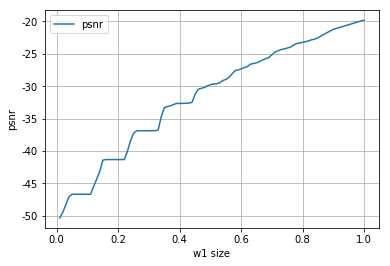

In [136]:
df_w1 = pd.read_csv('./simulation/sim_w1/res.csv')
df_w1 = df_w1[df_w1['psnr'] != 0]
size = df_w1['size']
psnr = df_w1['psnr']

plt.plot(list(size), list(psnr), label='psnr')
plt.legend()
plt.xlabel('w1 size')
plt.ylabel('psnr')
plt.grid()
plt.savefig('./simulation/sim_w1/psnr.pdf')
plt.show()

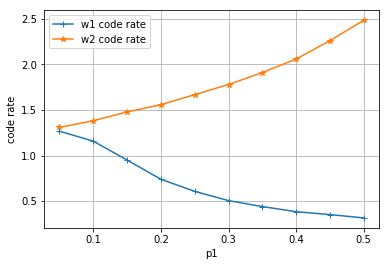

In [147]:
df_p1 = pd.read_csv('simulation/sim_p1/Sat_Mar_23_20_47_21_2019.csv')

w1 = list(df_p1['w1_done'])
w2 = list(df_p1['w2_done'])
p1 = list(df_p1['p1'])

plt.plot(p1, w1, marker='+', label='w1 code rate')
plt.plot(p1, w2, marker='*', label='w2 code rate')

plt.xlabel('p1')
plt.ylabel('code rate')
plt.grid()
plt.legend()
plt.savefig('./simulation/sim_p1/p1.pdf')
plt.show()


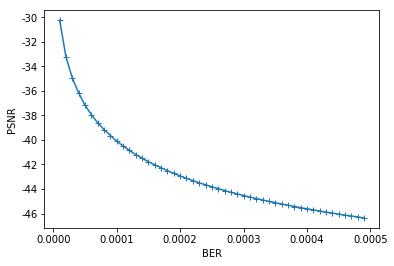

In [157]:
df_com = pd.read_csv('./simulation/sim_compare/compare.csv')
BER = df_com['BER']
psnr = df_com['psnr']

plt.plot(BER, psnr, marker='+', label='w1 code rate')
plt.xlabel('BER')
plt.ylabel('PSNR')
plt.show()

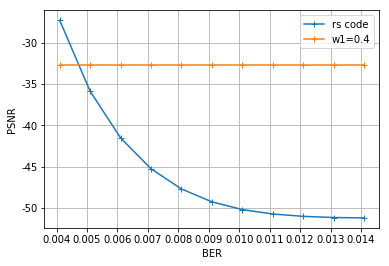

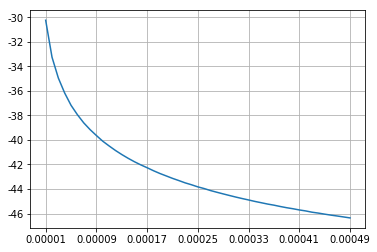

In [89]:
df_rs = pd.read_csv('./simulation/sim_rs/Mon_Mar_25_15_40_16_2019rs_compare.csv')
df_no_rs = pd.read_csv('./simulation/sim_compare/compare.csv')

df_rs = df_rs[df_rs['psnr'] < -20]
no_rs_psnr = df_no_rs['psnr']
rs_psnr = df_rs['psnr']
ber = df_rs['BER']

fou_psnr = [-32.67 for ii in ber]
plt.plot(ber, rs_psnr, marker="+", label="rs code")
plt.plot(ber, fou_psnr, marker="+", label="w1=0.4")
plt.xlabel("BER")
plt.ylabel("PSNR")
plt.legend()
plt.xticks(np.arange(0.004, 0.0142, 0.001))
plt.grid()
plt.savefig('./simulation/sim_rs/Mon_Mar_25_15_40_16_2019.pdf')
plt.show()

plt.plot(df_no_rs['BER'], no_rs_psnr)
plt.xticks(np.arange(0.00001, 0.0005, 0.00008))
plt.grid()

[0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071, 0.0081, 0.0091, 0.0101, 0.0111, 0.0121, 0.0131, 0.0141]


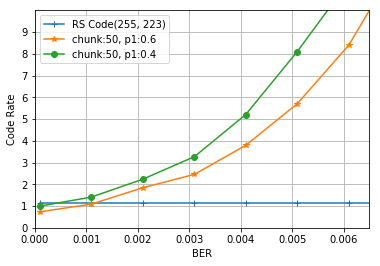

In [217]:
import numpy as np
ber = np.arange(0.0001, 0.015, 0.001)

df_50_6 = pd.read_csv('./simulation/sim_ber/Mon_Mar_25_17_03_33_2019_0.6.csv')
df_50_4 = pd.read_csv('./simulation/sim_ber/Mon_Mar_25_18_32_18_2019_0.4_50.csv')
df_75_4 = pd.read_csv('./simulation/sim_ber/Mon_Mar_25_22_11_25_2019_0.4_75.csv')


ber = df_50_6['ber']
code_rate0 = [255 / 223.0 for ii in ber]
code_rate1 = df_50_6['w1_done']
code_rate2 = df_50_4['w1_done']
code_rate3 = df_75_4['w1_done']

plt.plot(ber, code_rate0, marker="+", label="RS Code(255, 223)")
plt.plot(ber, code_rate1, marker="*", label="chunk:50, p1:0.6")
plt.plot(ber, code_rate2, marker="o", label="chunk:50, p1:0.4")
# plt.plot(ber, code_rate3, marker="^", label="chunk:50, p1:0.4")
print(list(ber))
plt.ylim(0, 10)
plt.xlim(0, 0.0065)
plt.yticks(np.arange(0,10,1))
plt.legend()
plt.grid()
plt.xlabel('BER')
plt.ylabel('Code Rate')
plt.savefig('./simulation/sim_ber/ber.pdf')
plt.show()

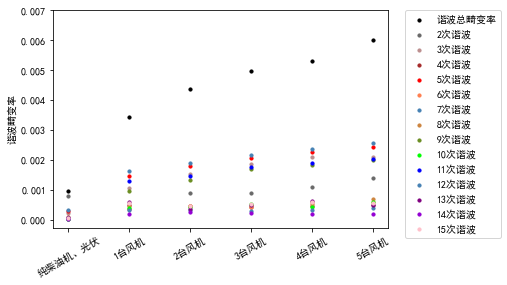

In [45]:
# xx
df = pd.read_csv(r'simulation\xxx.csv')
ll = ['纯柴油机、光伏','1台风机','2台风机','3台风机','4台风机','5台风机']
X = df['X']
y1 = df['a']
y2 = df['b']
y3 = df['c']
y4 = df['d']
y5 = df['e']
y6 = df['f']
y7 = df['g']
y8 = df['h']
y9 = df['i']
y10 = df['j']
y11 = df['k']
y12 = df['l']
y13 = df['m']
y14 = df['n']
y15 = df['o']

# plt.bar(d, u_d_f, label='鲁棒孤波分布\nc=0.03, δ=0.05')
# plt.plot(K2, w1_overhead2, marker='*', label='(w1done,3s)w1', color='steelblue', markersize=5, markerfacecolor='none', linestyle='--')
t=np.arange(0.0,2.0,0.1)
s=np.sin(t*np.pi)
figure,ax=plt.subplots(2,3)
ax[0][0].plot(t,s,'r*')
ax[0][1].plot(t*2,s,'b--')
figure

plt.scatter(X, y1, marker='o', label='谐波总畸变率', s=10, color='black')
plt.scatter(X, y2, marker='o', label='2次谐波', s=10,color='dimgrey')
plt.scatter(X, y3, marker='o', label='3次谐波', s=10,color='rosybrown')
plt.scatter(X, y4, marker='o', label='4次谐波', s=10,color='brown')
plt.scatter(X, y5, marker='o', label='5次谐波', s=10,color='red')
plt.scatter(X, y6, marker='o', label='6次谐波', s=10,color='coral')
plt.scatter(X, y7, marker='o', label='7次谐波', s=10,color='steelblue')
plt.scatter(X, y8, marker='o', label='8次谐波', s=10,color='peru')
plt.scatter(X, y9, marker='o', label='9次谐波', s=10,color='olivedrab')
plt.scatter(X, y10, marker='o', label='10次谐波', s=10,color='lime')
plt.scatter(X, y11, marker='o', label='11次谐波', s=10,color='blue')
plt.scatter(X, y12, marker='o', label='12次谐波', s=10,color='steelblue')
plt.scatter(X, y13, marker='o', label='13次谐波', s=10,color='purple')
plt.scatter(X, y14, marker='o', label='14次谐波', s=10,color='darkviolet')
plt.scatter(X, y15, marker='o', label='15次谐波', s=10,color='pink')

plt.xticks(range(0, 6, 1), labels=ll, rotation=30)
plt.yticks(np.arange(0, 0.008, 0.001))
plt.xlabel('')
plt.ylabel('谐波畸变率')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
# plt.grid()
plt.savefig('./simulation/xxx' +time.asctime().replace(' ', '_').replace(':', '_') + '.pdf')

In [40]:
# xx
df = pd.read_csv(r'simulation\xxx.csv')
ll = ['纯柴油机、光伏','1台风机','2台风机','3台风机','4台风机','5台风机']
X = df['X'][0:6]
y1 = df['a'][0:6]
y2 = df['b'][0:6]
y3 = df['c'][0:6]
y4 = df['d'][0:6]
y5 = df['e'][0:6]
y6 = df['f'][0:6]
y7 = df['g'][0:6]
y8 = df['h'][0:6]
y9 = df['i'][0:6]
y10 = df['j'][0:6]
y11 = df['k'][0:6]
y12 = df['l'][0:6]
y13 = df['m'][0:6]
y14 = df['n'][0:6]
y15 = df['o'][0:6]

# plt.bar(d, u_d_f, label='鲁棒孤波分布\nc=0.03, δ=0.05')
# plt.plot(K2, w1_overhead2, marker='*', label='(w1done,3s)w1', color='steelblue', markersize=5, markerfacecolor='none', linestyle='--')

# plt.plot(X, y1, marker='*', label='谐波总畸变率', color='black', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y2, marker='*', label='2次谐波', color='dimgrey', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y3, marker='*', label='3次谐波', color='rosybrown', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y4, marker='*', label='4次谐波', color='brown', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y5, marker='*', label='5次谐波', color='red', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y6, marker='*', label='6次谐波', color='coral', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y7, marker='*', label='7次谐波', color='yellow', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y8, marker='*', label='8次谐波', color='peru', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y9, marker='*', label='9次谐波', color='olivedrab', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y10, marker='*', label='10次谐波', color='lime', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y11, marker='*', label='11次谐波', color='blue', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y12, marker='*', label='12次谐波', color='steelblue', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y13, marker='*', label='13次谐波', color='purple', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y14, marker='*', label='14次谐波', color='darkviolet', markersize=5, markerfacecolor='none', linestyle='--')
plt.plot(X, y15, marker='*', label='15次谐波', color='pink', markersize=5, markerfacecolor='none', linestyle='--')

plt.xticks(range(0, 6, 1), labels=ll, rotation=30)
plt.yticks(np.arange(0, 0.008+0.001, 0.001))
plt.xlabel('')
plt.ylabel('谐波畸变率')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
# plt.grid()
# plt.savefig('./simulation/xxx' +time.asctime().replace(' ', '_').replace(':', '_') + '.pdf')

KeyError: 'a'